In [19]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import  RobustScaler

In [2]:
cd

C:\Users\acer


In [3]:
train = pd.read_csv("train.csv")
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
train.shape

(233154, 41)

In [5]:
tr= train

In [6]:
tr.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [7]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

In [8]:
tr.set_index('UniqueID', inplace =True)

In [9]:
tr['loan_default'].value_counts()

0    182543
1     50611
Name: loan_default, dtype: int64

In [10]:
test = pd.read_csv('test.csv')
test.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [11]:
ts = test.set_index('UniqueID')

In [12]:
ts.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
UniqueID,,,,,,,,,,,,,,,,,,,,,
655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,03-11-18,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,20-11-18,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,29-11-18,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,29-11-18,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,17-11-18,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [13]:
ts.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES'],
      dtype='object')

In [14]:
tr.isnull().sum()

disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                          0
PRI.OVERDUE.ACCTS               

In [15]:
ts.isnull().sum()

disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        3443
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                          0
PRI.OVERDUE.ACCTS               

In [20]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112392 entries, 655269 to 755244
Data columns (total 39 columns):
disbursed_amount                       112392 non-null int64
asset_cost                             112392 non-null int64
ltv                                    112392 non-null float64
branch_id                              112392 non-null int64
supplier_id                            112392 non-null int64
manufacturer_id                        112392 non-null int64
Current_pincode_ID                     112392 non-null int64
Date.of.Birth                          112392 non-null object
Employment.Type                        108949 non-null object
DisbursalDate                          112392 non-null object
State_ID                               112392 non-null int64
Employee_code_ID                       112392 non-null int64
MobileNo_Avl_Flag                      112392 non-null int64
Aadhar_flag                            112392 non-null int64
PAN_flag                 

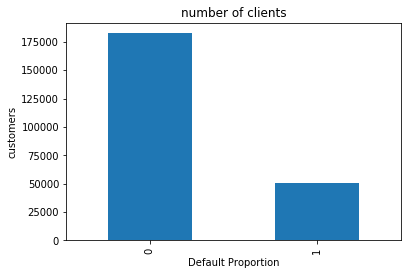

In [21]:
## Train data showing the default proportions where 0 denotes as non-default and 1 denotes as default
tr.loan_default.value_counts().plot.bar()
plt.xlabel('Default Proportion')
plt.ylabel('customers')
plt.title('number of clients')
plt.show()

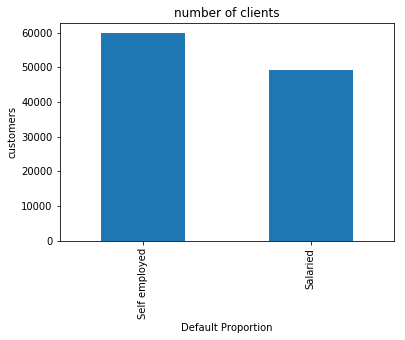

In [22]:
##Test data showing the employment info of the customers

ts['Employment.Type'].value_counts().plot.bar()
plt.xlabel('Default Proportion')
plt.ylabel('customers')
plt.title('number of clients')
plt.show()

In [35]:
ts['MobileNo_Avl_Flag'].count()

112392

In [36]:
train['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
NAN                7661
Name: Employment.Type, dtype: int64

In [37]:
ts['Employment.Type'].value_counts()

Self employed    59794
Salaried         49155
NAN               3443
Name: Employment.Type, dtype: int64

In [38]:
tr.fillna('NAN',inplace=True)
ts.fillna('NAN',inplace=True)

In [39]:
tr['Employment.Type'].value_counts(normalize=True)

Self employed    0.547428
Salaried         0.419714
NAN              0.032858
Name: Employment.Type, dtype: float64

In [40]:
ts['Employment.Type'].value_counts(normalize=True)

Self employed    0.532013
Salaried         0.437353
NAN              0.030634
Name: Employment.Type, dtype: float64

Thus the missing values in train data is 3.28% and missing values in test data is 3.06% for the employment data. The data reflects that the details of the customers are not updated for income source type and these people can be at a high risk of default if they don't have an actual employment. Since we don't have any info regarding the employment type of these people and they constitute only small dataset, we can update the missing values as NAN and drop them to do further analysis and check if still we can get significant results

In [41]:
#Creating function for checking the correlation between variables
def correlationplot(data,width):
    corr = data.corr()
    plt.figure(num=None,figsize=(width, width), dpi=80, facecolor='w', edgecolor='black')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix')
    plt.show()

In [42]:
train.corr()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
UniqueID,1.000000,0.145575,0.144671,-0.030537,-0.004509,0.025747,-0.021514,0.030500,-0.057734,0.075983,...,-0.027486,-0.013428,-0.017114,-0.016857,-0.009321,-0.013518,-0.003842,-0.009186,0.016537,0.033848
disbursed_amount,0.145575,1.000000,0.752668,0.376747,0.018328,0.078596,0.095203,0.068540,-0.023956,0.010120,...,-0.007305,-0.004227,-0.005271,-0.005119,0.002350,-0.005525,0.035880,0.020198,0.038513,0.077675
asset_cost,0.144671,0.752668,1.000000,-0.301188,0.018586,0.150002,-0.005256,0.275878,-0.026348,0.008711,...,-0.013455,-0.008697,-0.010776,-0.010594,-0.004356,-0.005738,-0.021968,-0.007932,-0.017301,0.014261
ltv,-0.030537,0.376747,-0.301188,1.000000,0.006382,-0.103732,0.121003,-0.300112,0.004882,0.004940,...,0.010256,0.007195,0.008800,0.008733,0.007358,0.000481,0.083824,0.041921,0.085725,0.098208
branch_id,-0.004509,0.018328,0.018586,0.006382,1.000000,0.225744,-0.049957,0.048192,0.187782,0.088764,...,-0.007104,0.001418,0.002404,0.002457,0.004955,0.004265,-0.008354,-0.001730,-0.001813,0.030193
supplier_id,0.025747,0.078596,0.150002,-0.103732,0.225744,1.000000,-0.063916,0.187401,0.105502,0.095792,...,-0.015665,-0.008729,-0.010175,-0.010031,-0.011953,-0.005826,-0.053264,-0.024622,-0.030988,0.027357
manufacturer_id,-0.021514,0.095203,-0.005256,0.121003,-0.049957,-0.063916,1.000000,-0.104349,0.026412,-0.045009,...,0.008152,0.003106,0.003206,0.003301,0.014116,0.003020,0.050079,0.019438,0.010012,-0.025039
Current_pincode_ID,0.030500,0.068540,0.275878,-0.300112,0.048192,0.187401,-0.104349,1.000000,0.047903,-0.042609,...,-0.036228,-0.021048,-0.026059,-0.025630,0.002275,-0.006305,-0.100080,-0.057419,-0.058821,0.028419
State_ID,-0.057734,-0.023956,-0.026348,0.004882,0.187782,0.105502,0.026412,0.047903,1.000000,0.117309,...,0.015679,0.013231,0.017842,0.017651,0.015843,0.009850,-0.014942,-0.000655,-0.016129,0.048075
Employee_code_ID,0.075983,0.010120,0.008711,0.004940,0.088764,0.095792,-0.045009,-0.042609,0.117309,1.000000,...,-0.006537,-0.003543,-0.002259,-0.002224,0.013470,0.001894,0.005473,0.003624,-0.002108,0.020657


In [43]:
#Creating function for checking the relation between variables using histogram

def histogramplot(data, no_of_rows):
    nrow,ncol = data.shape
    for i in range (ncol,no_of_rows):
        plt.subplot(ncol,no_of_rows)
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.show()
        
histogramplot(tr,8)

In [44]:
tr.reset_index(inplace=True)

In [47]:
tr.head()

,index,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


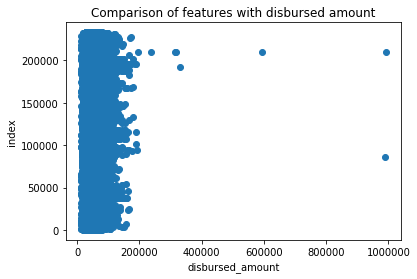

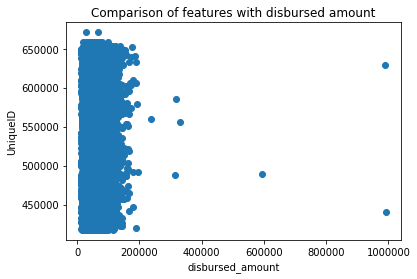

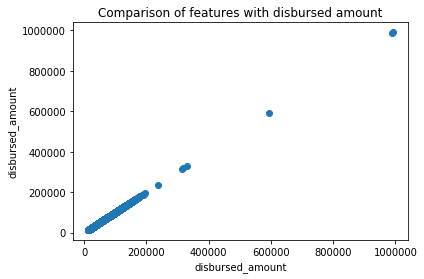

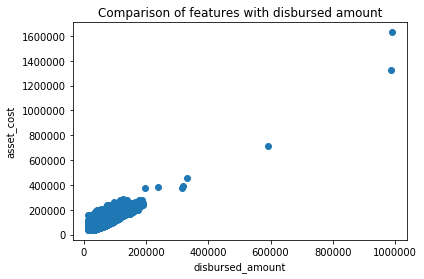

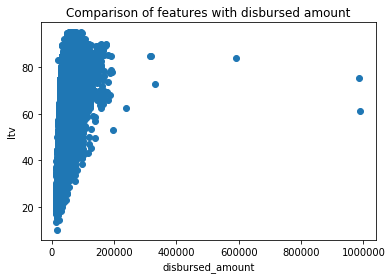

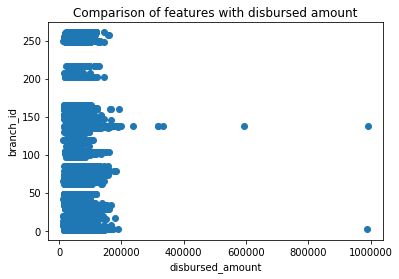

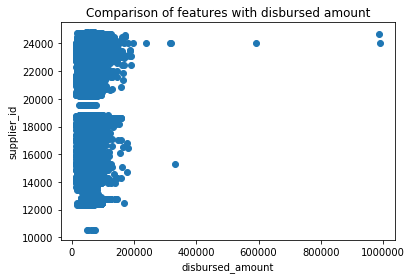

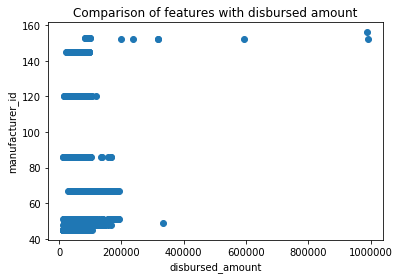

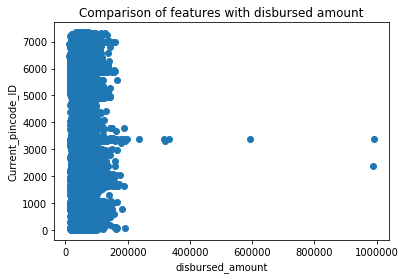

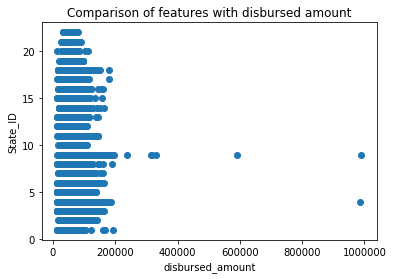

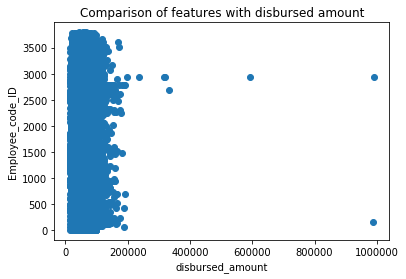

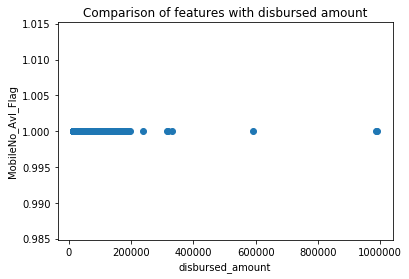

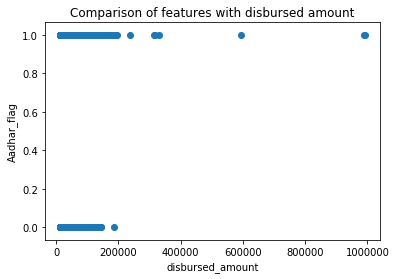

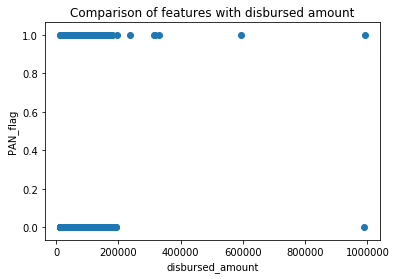

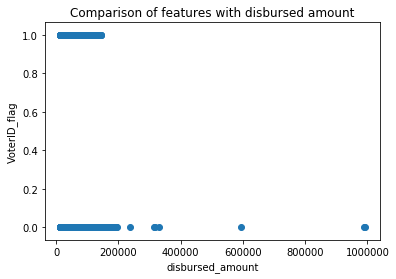

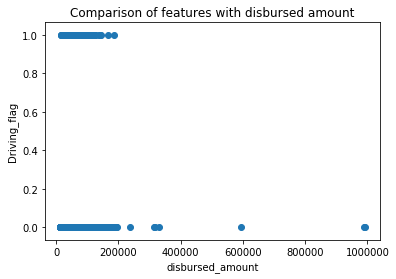

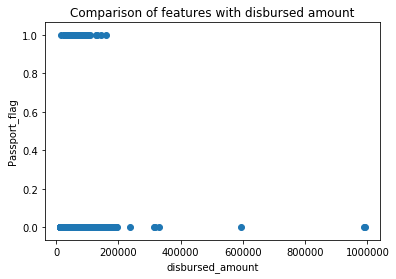

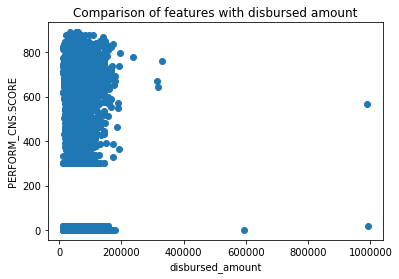

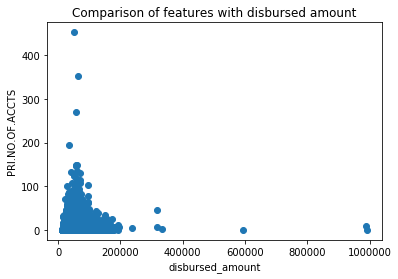

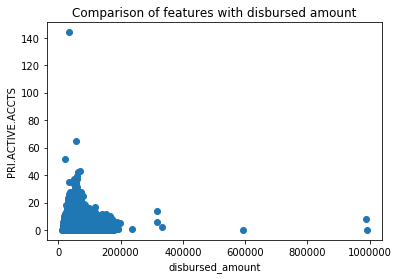

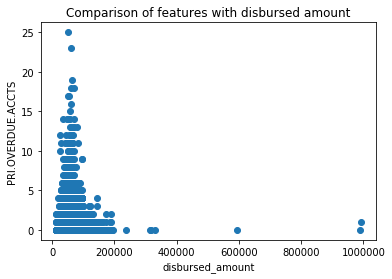

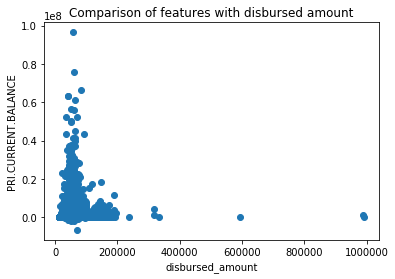

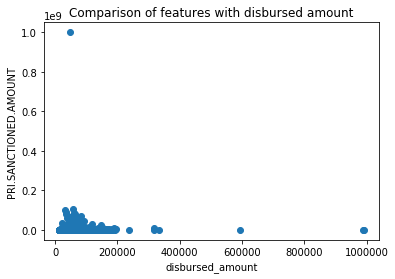

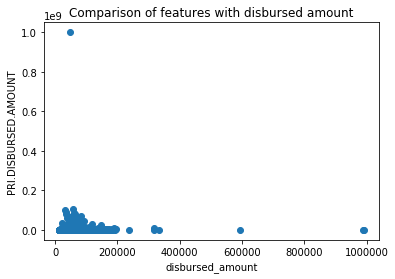

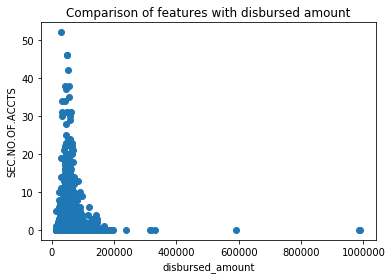

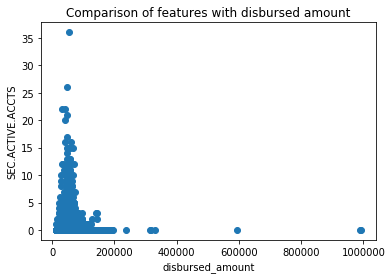

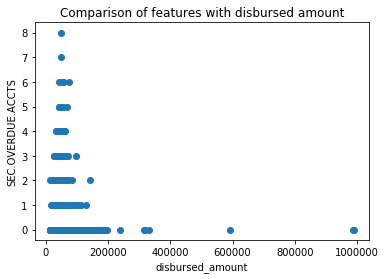

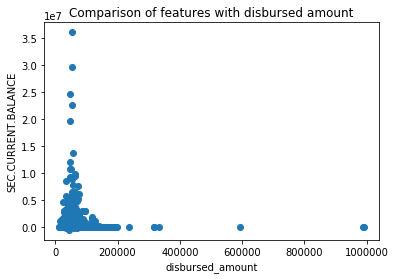

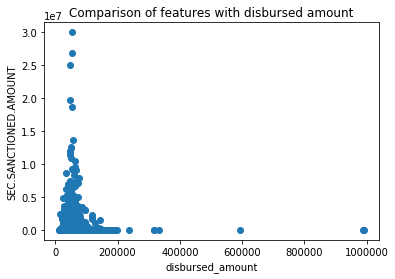

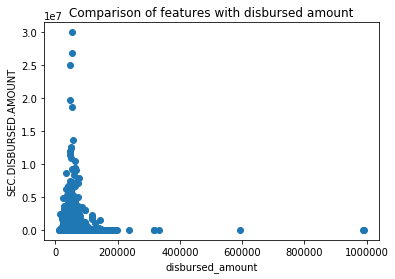

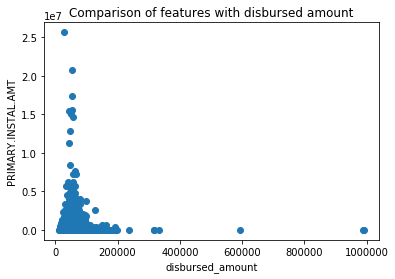

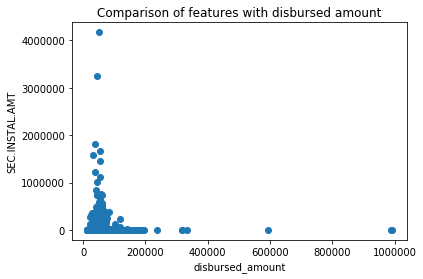

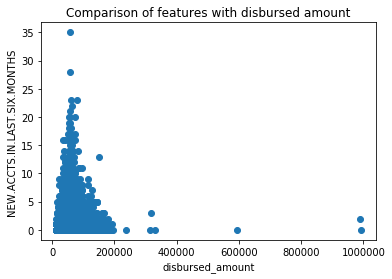

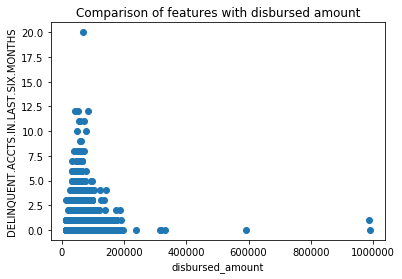

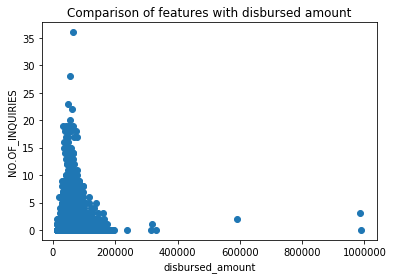

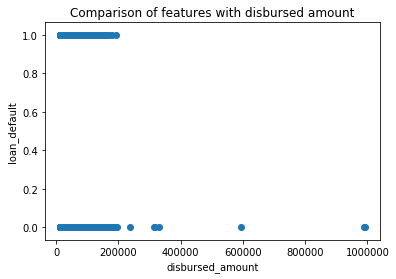

In [50]:
def print_all_values():
    df1=tr.drop('disbursed_amount',axis=1)
    cols=tr.columns
    for col in cols:
        if (tr[col].dtypes !='object'):

            fig1=plt.figure()
            ax1=plt.axes()
            plt.scatter(tr.disbursed_amount,tr[[col]],alpha=1)
            plt.title('Comparison of features with disbursed amount')
            ax1 = ax1.set(xlabel='disbursed_amount', ylabel=col)
            plt.show()
            
            
print_all_values()

The above graphs are scatterplot to check the impact on different features w.r.t disbusred amount for train data. This helps majorly to check the category of disbursed_amount range which are more prone to default and the LTV on their respective loans.

###### checking the pattern of differnet varibales w.r.t uniqueID

<Figure size 432x288 with 0 Axes>

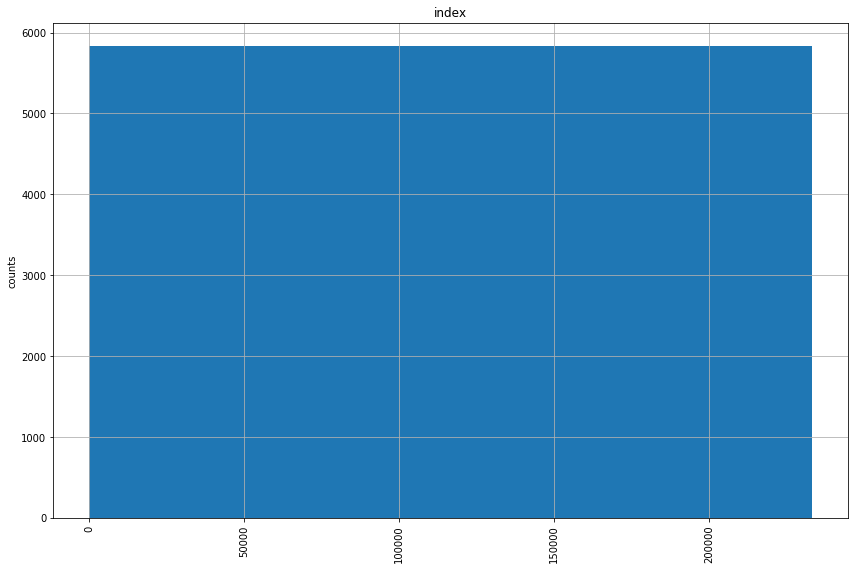

<Figure size 432x288 with 0 Axes>

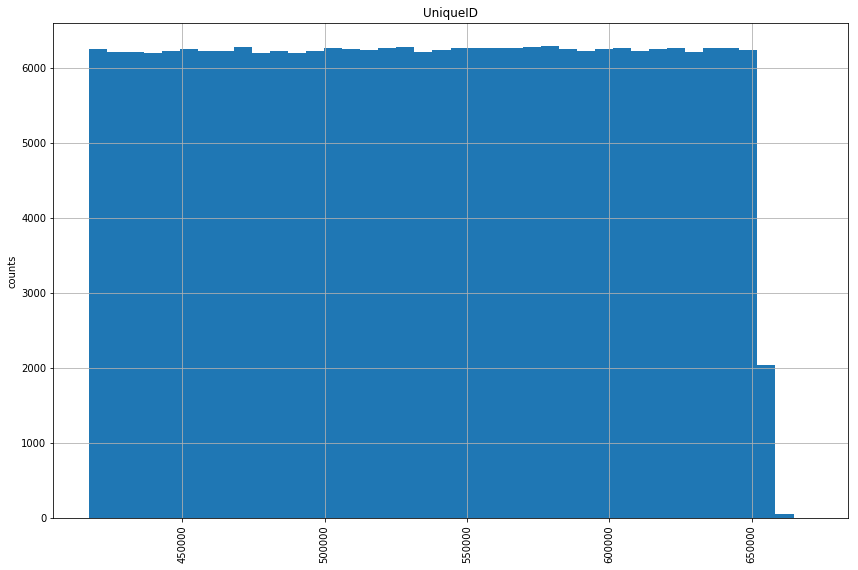

<Figure size 432x288 with 0 Axes>

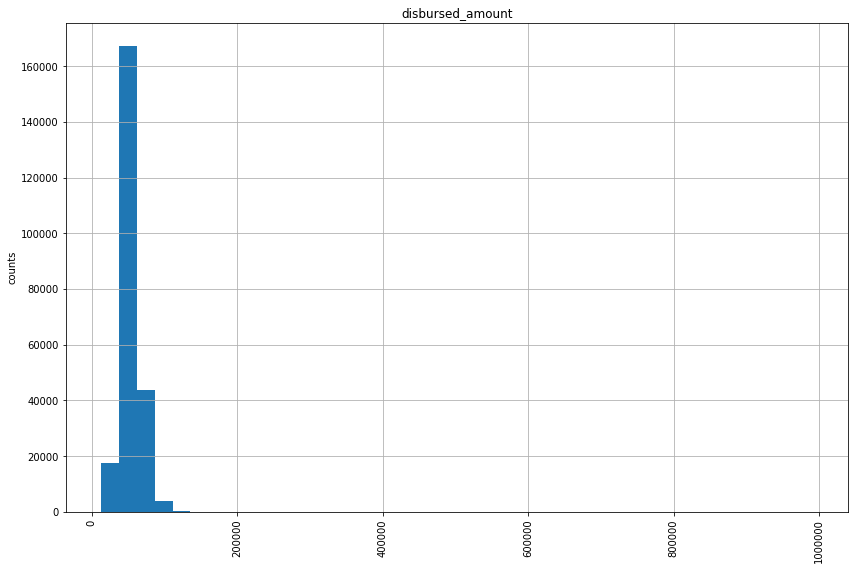

<Figure size 432x288 with 0 Axes>

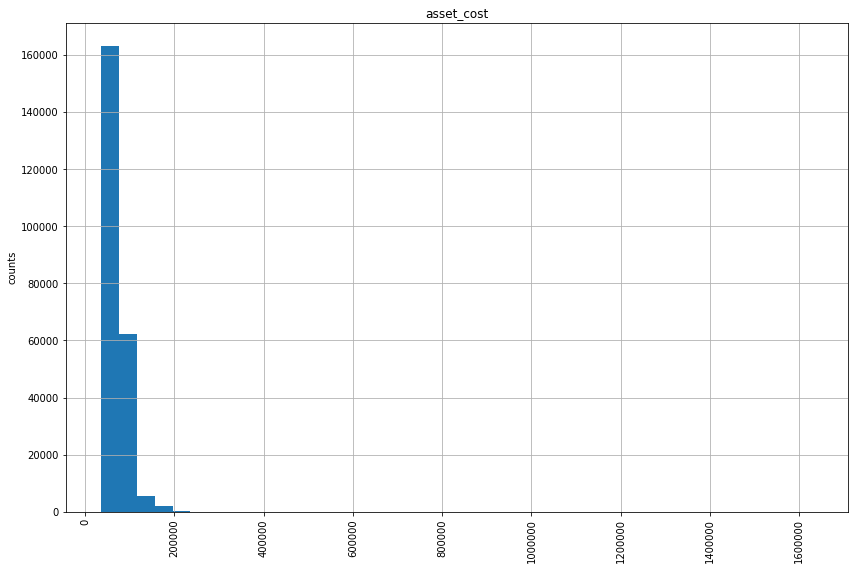

<Figure size 432x288 with 0 Axes>

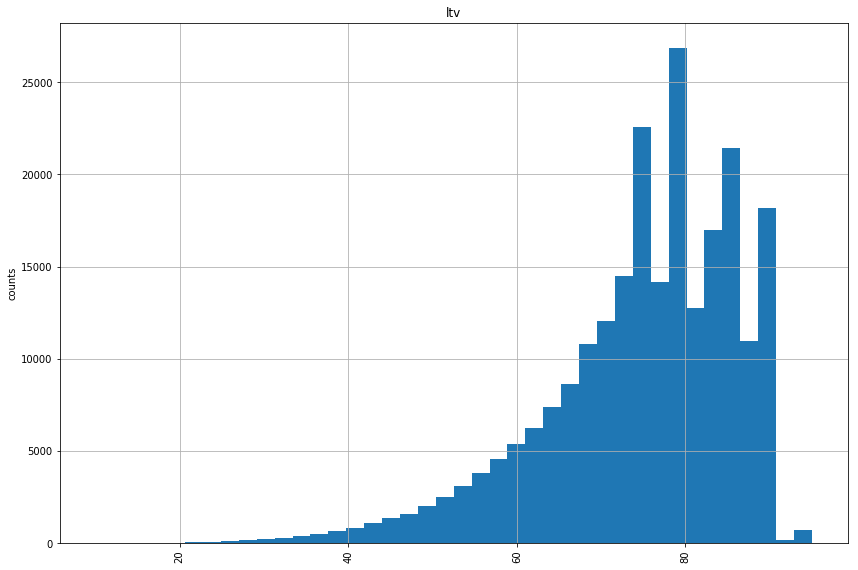

<Figure size 432x288 with 0 Axes>

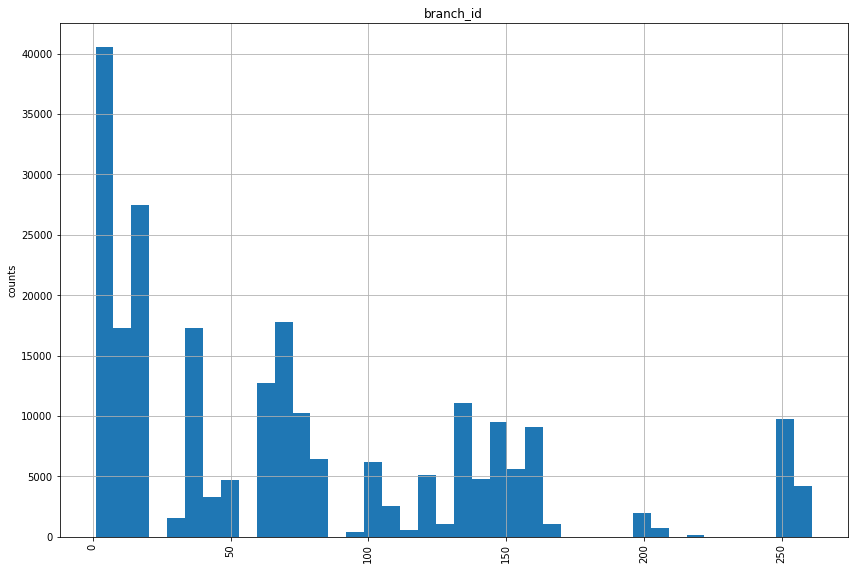

<Figure size 432x288 with 0 Axes>

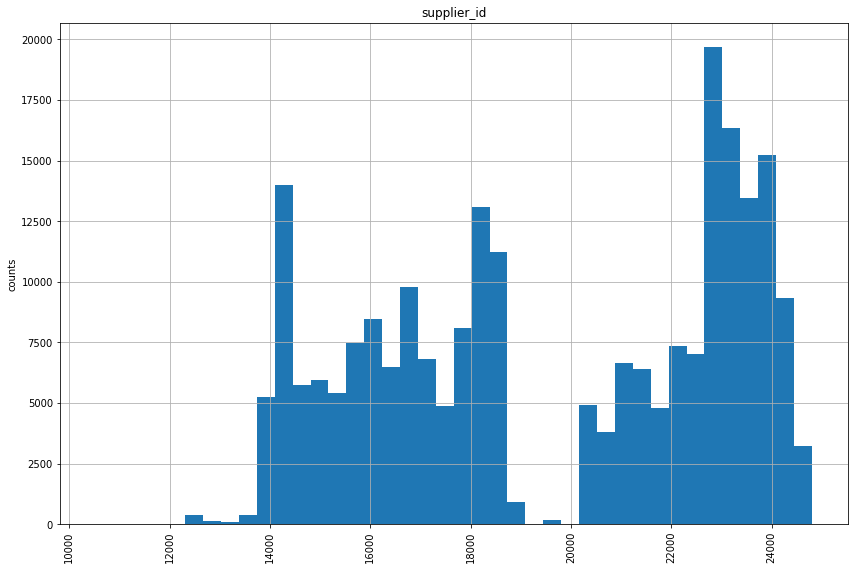

<Figure size 432x288 with 0 Axes>

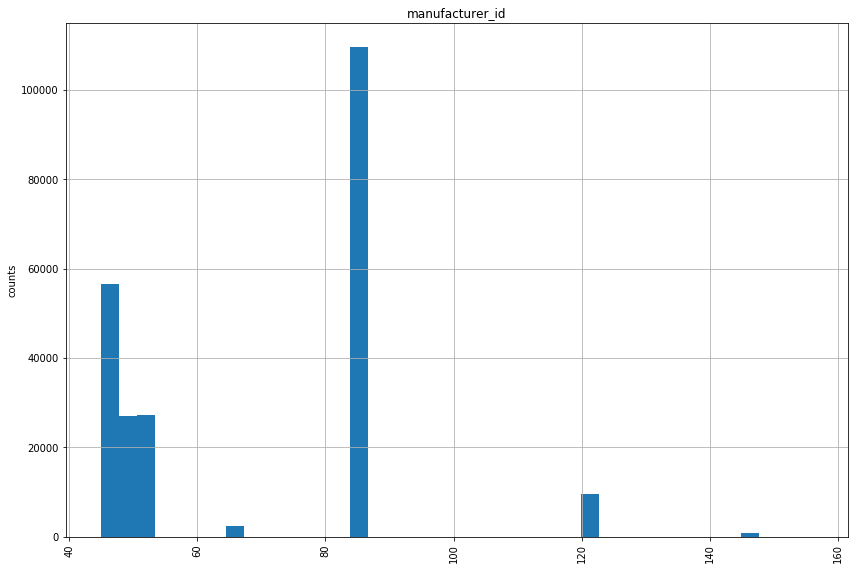

<Figure size 432x288 with 0 Axes>

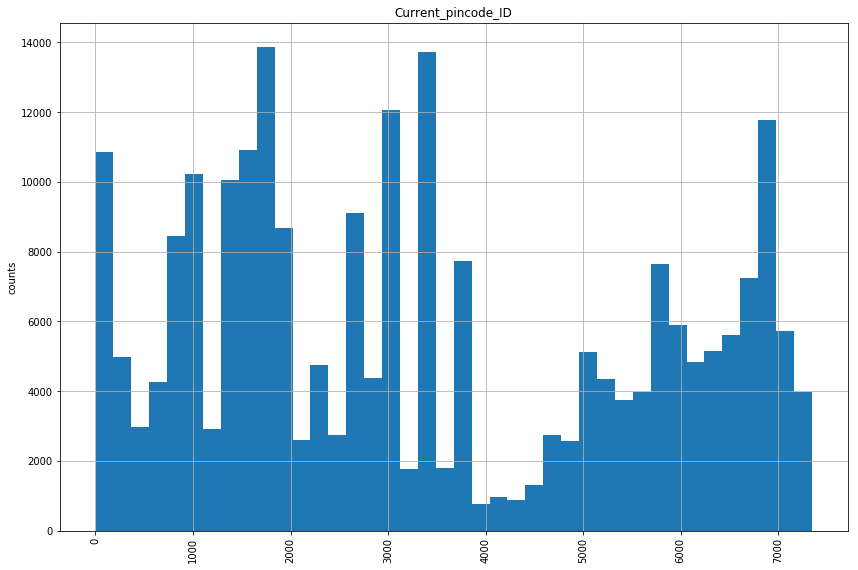

<Figure size 432x288 with 0 Axes>

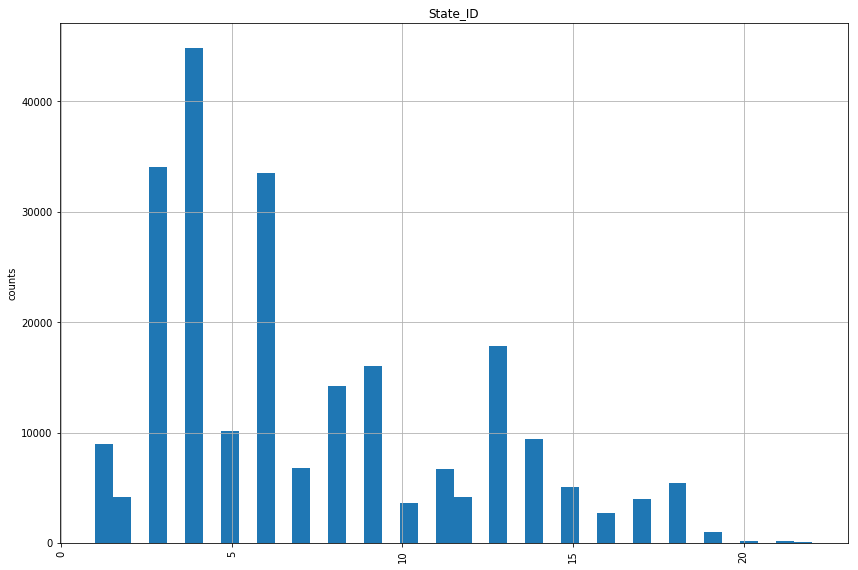

<Figure size 432x288 with 0 Axes>

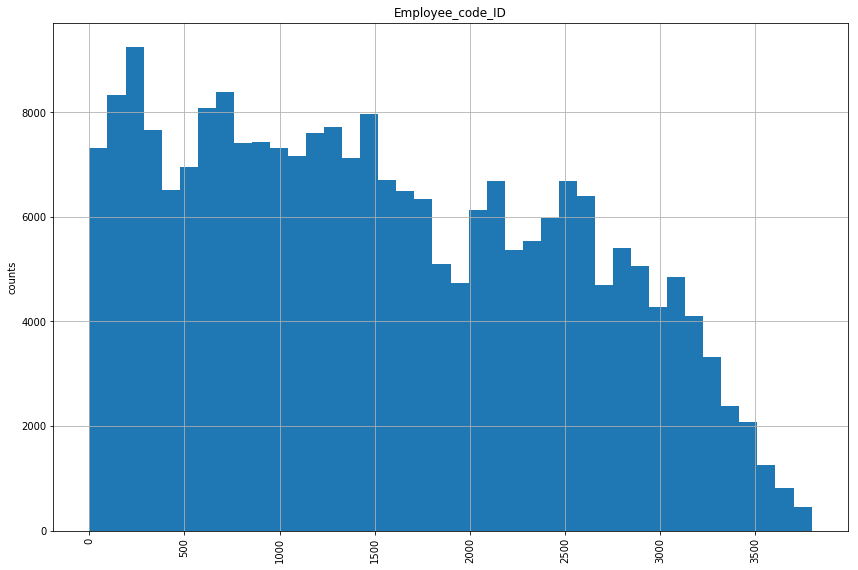

<Figure size 432x288 with 0 Axes>

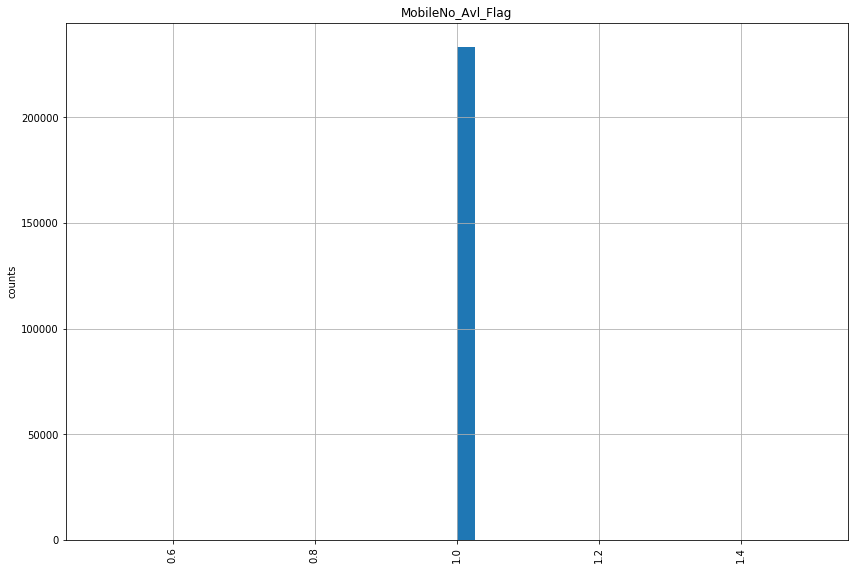

<Figure size 432x288 with 0 Axes>

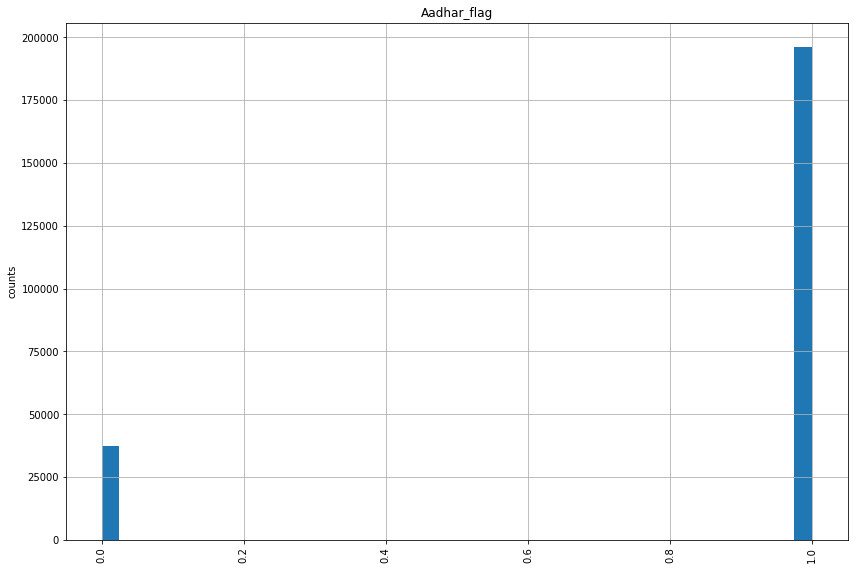

<Figure size 432x288 with 0 Axes>

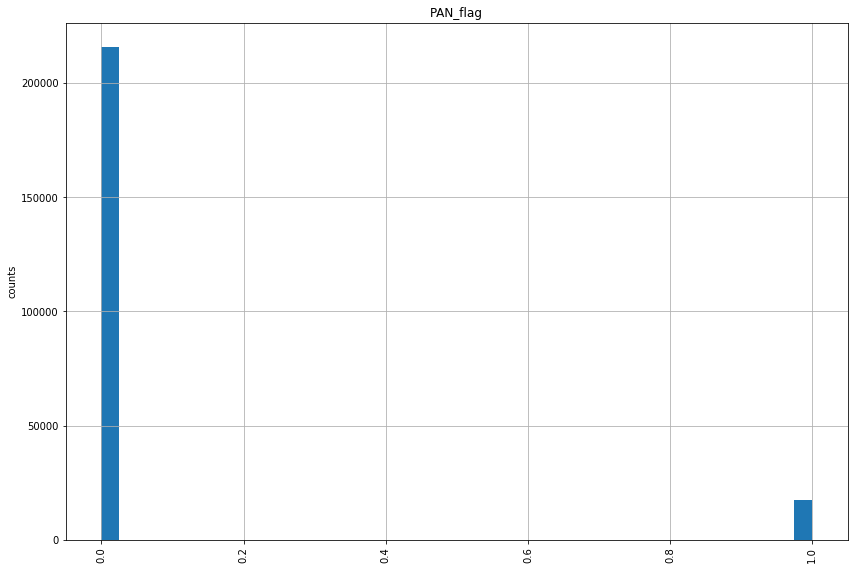

<Figure size 432x288 with 0 Axes>

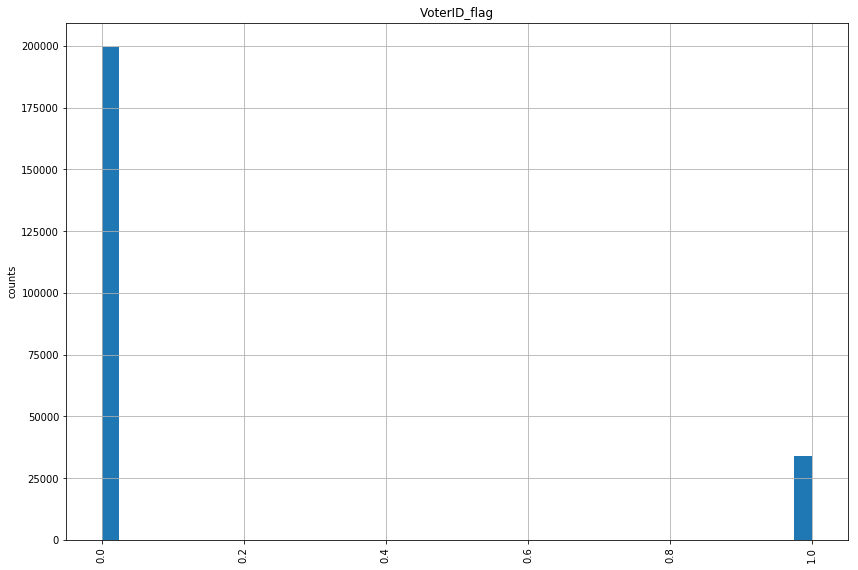

<Figure size 432x288 with 0 Axes>

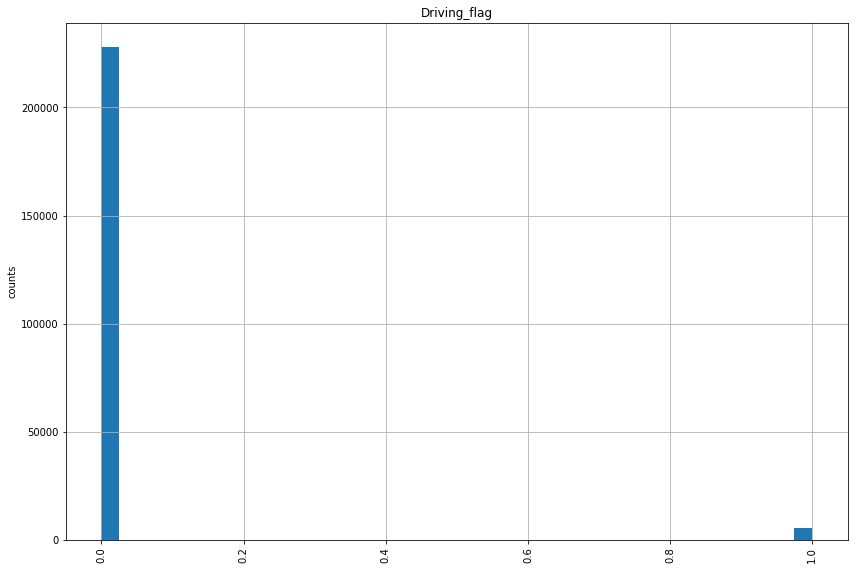

<Figure size 432x288 with 0 Axes>

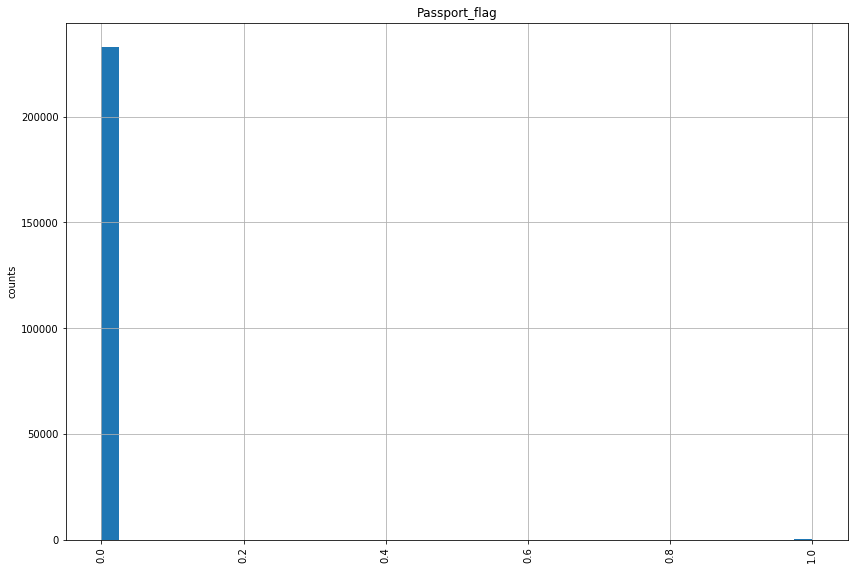

<Figure size 432x288 with 0 Axes>

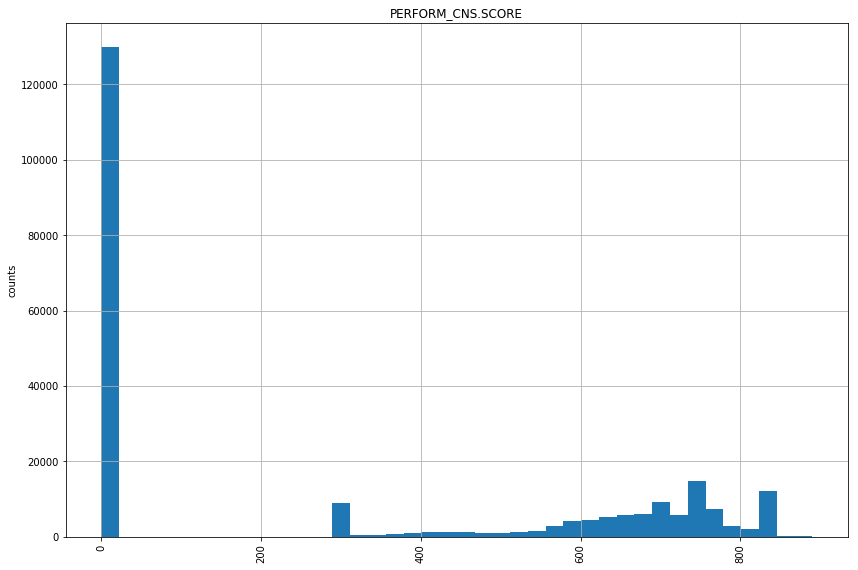

<Figure size 432x288 with 0 Axes>

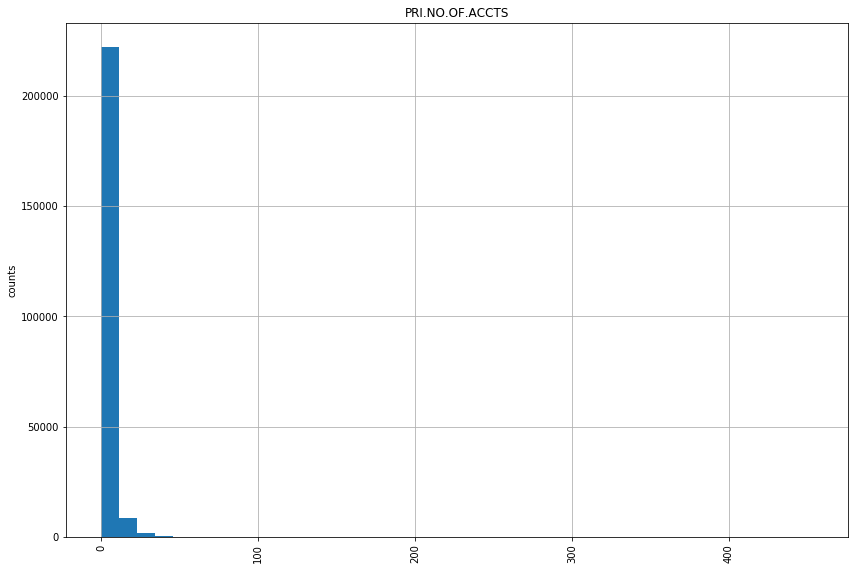

<Figure size 432x288 with 0 Axes>

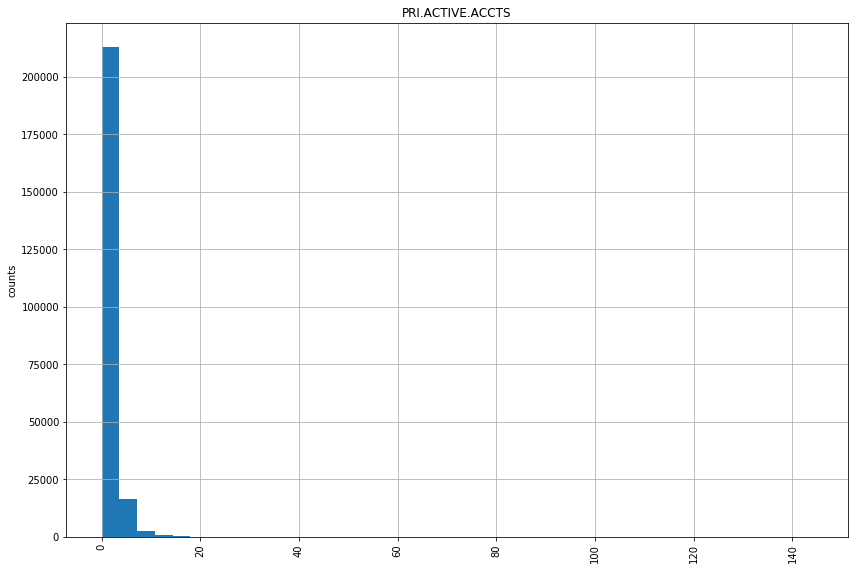

<Figure size 432x288 with 0 Axes>

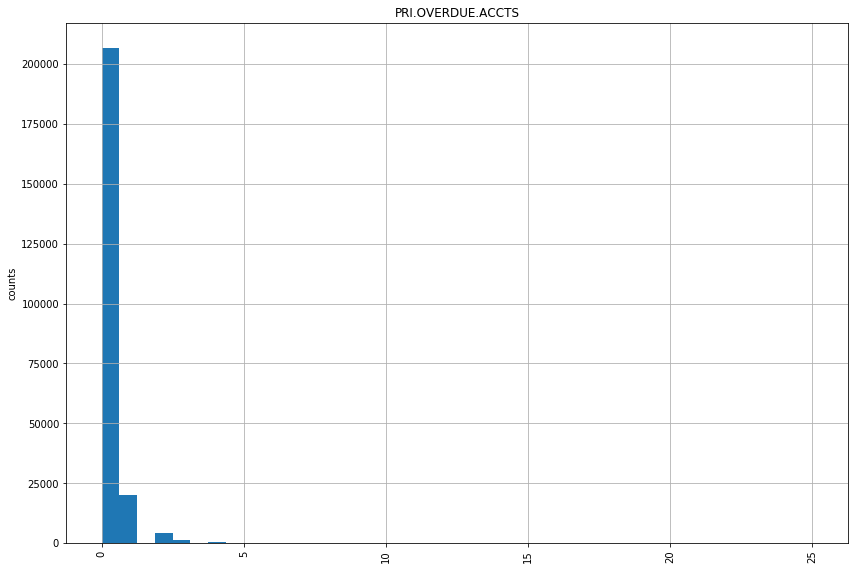

<Figure size 432x288 with 0 Axes>

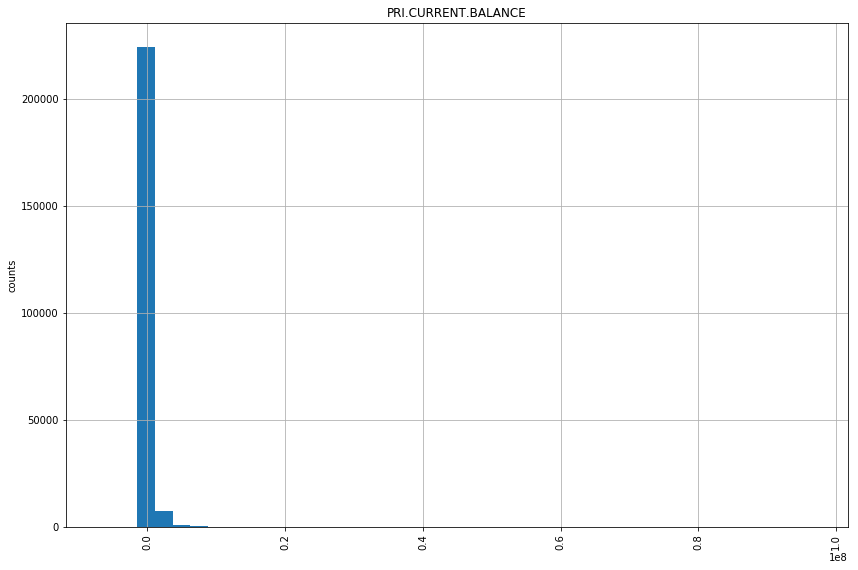

<Figure size 432x288 with 0 Axes>

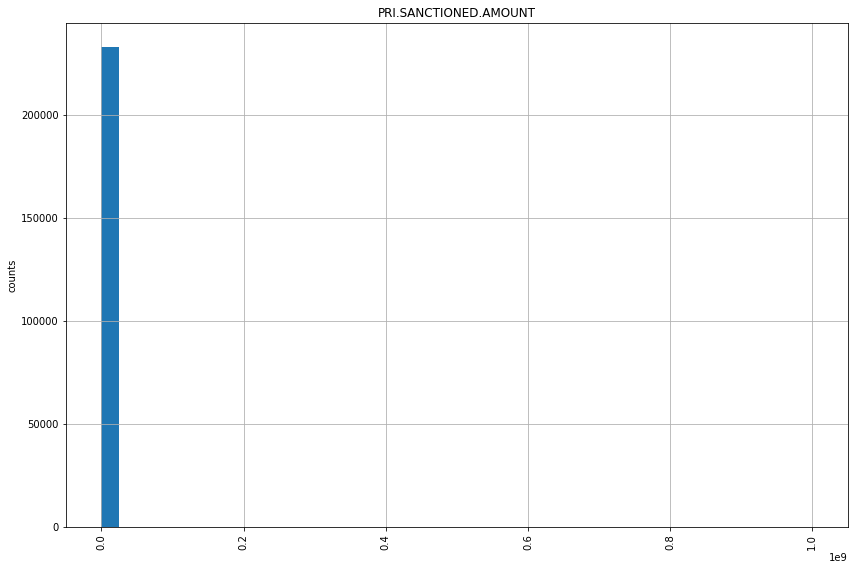

<Figure size 432x288 with 0 Axes>

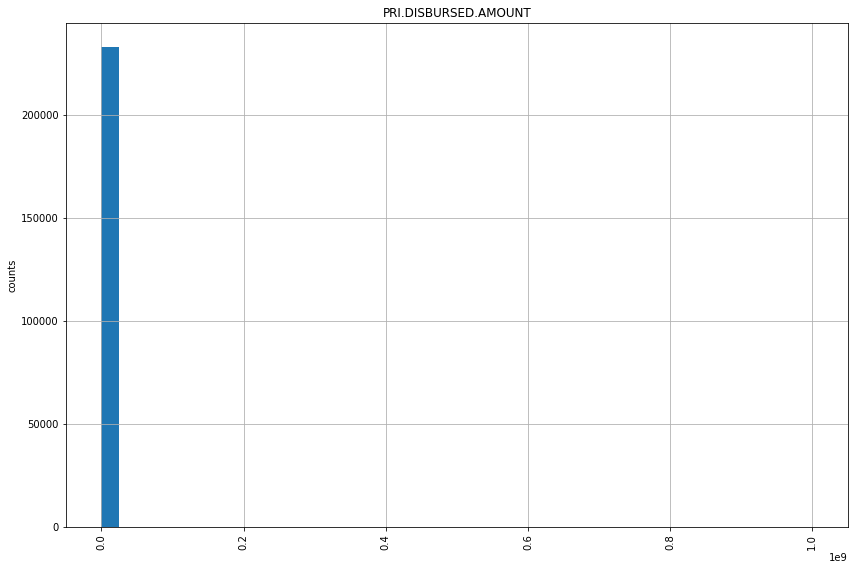

<Figure size 432x288 with 0 Axes>

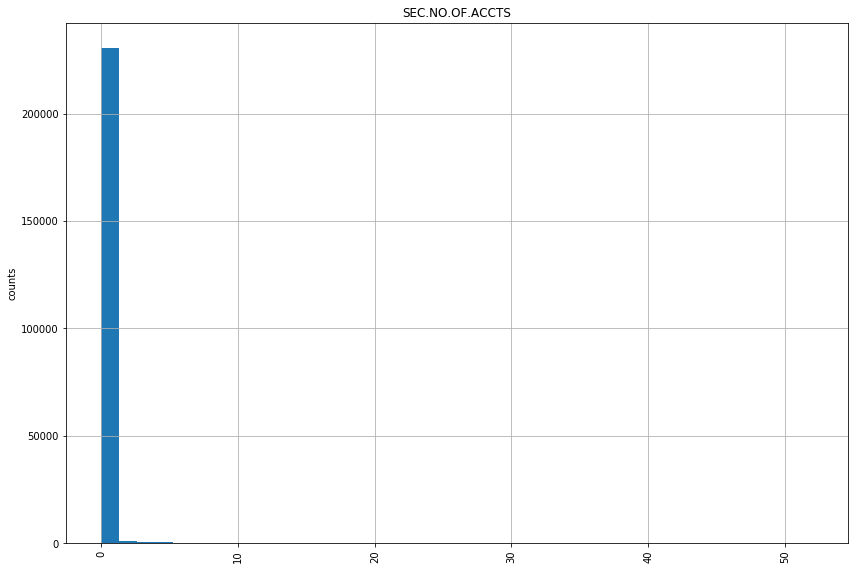

<Figure size 432x288 with 0 Axes>

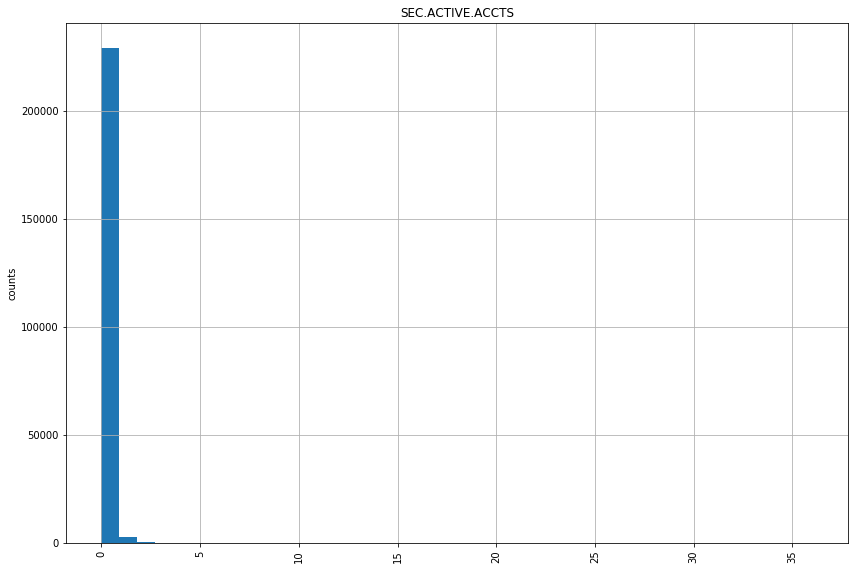

<Figure size 432x288 with 0 Axes>

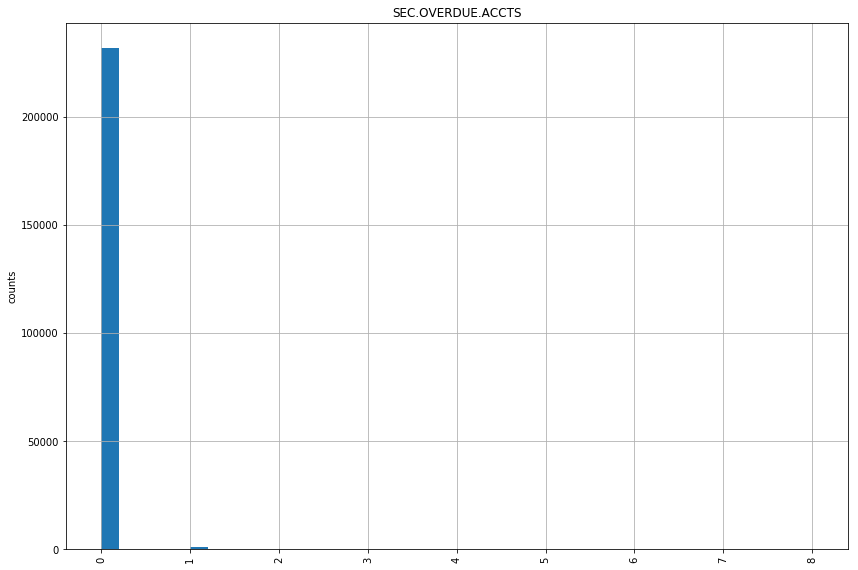

<Figure size 432x288 with 0 Axes>

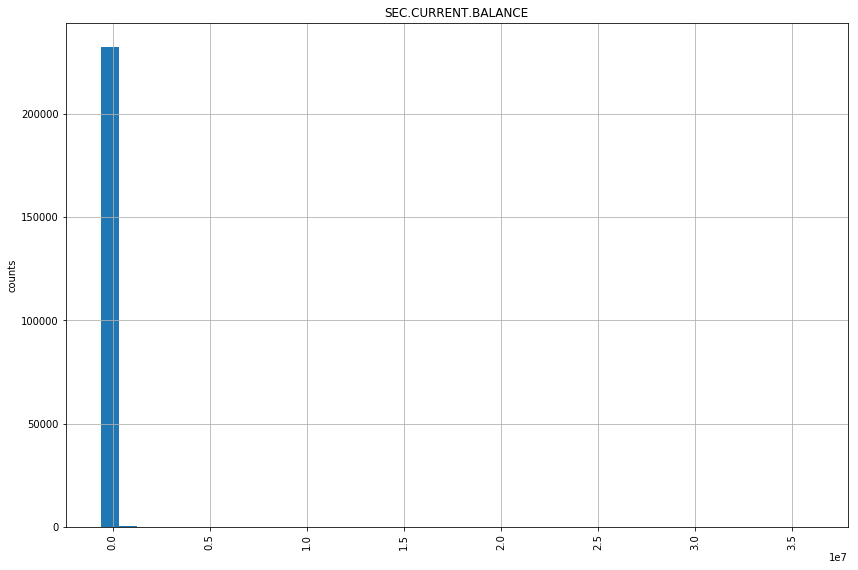

<Figure size 432x288 with 0 Axes>

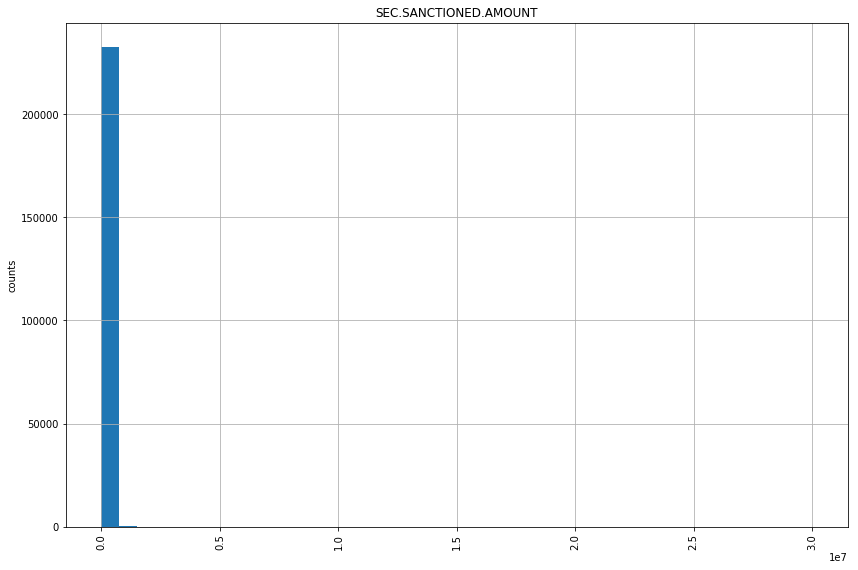

<Figure size 432x288 with 0 Axes>

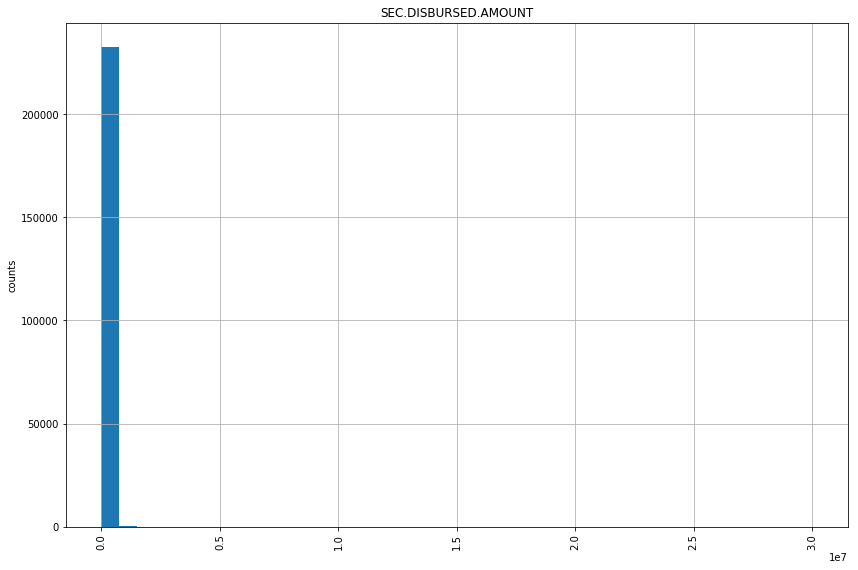

<Figure size 432x288 with 0 Axes>

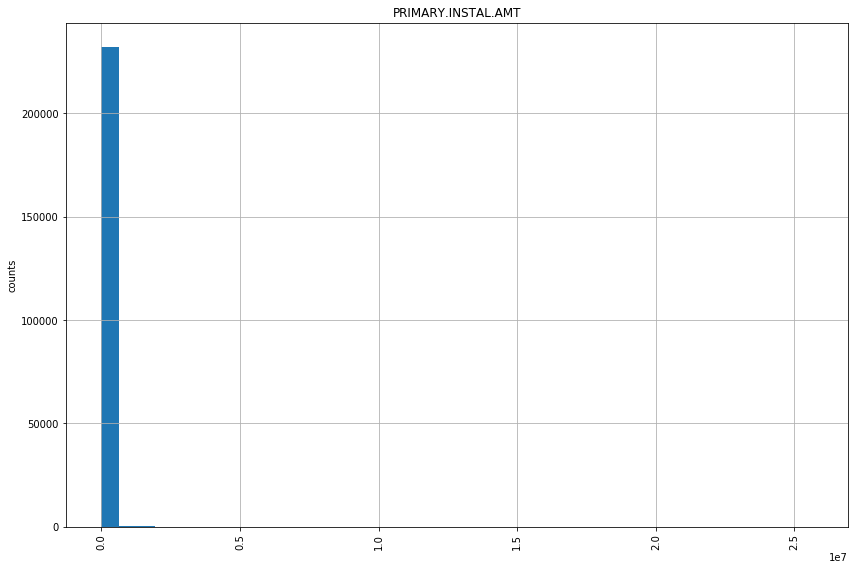

<Figure size 432x288 with 0 Axes>

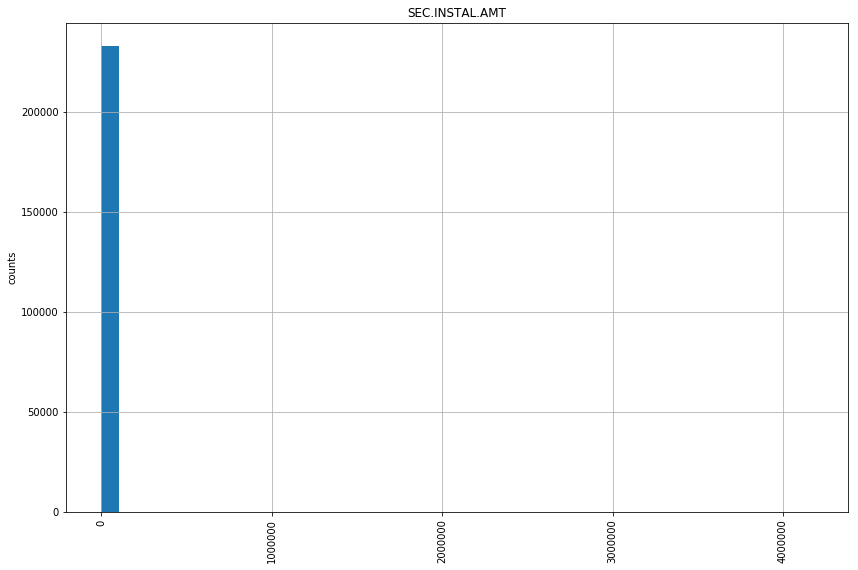

<Figure size 432x288 with 0 Axes>

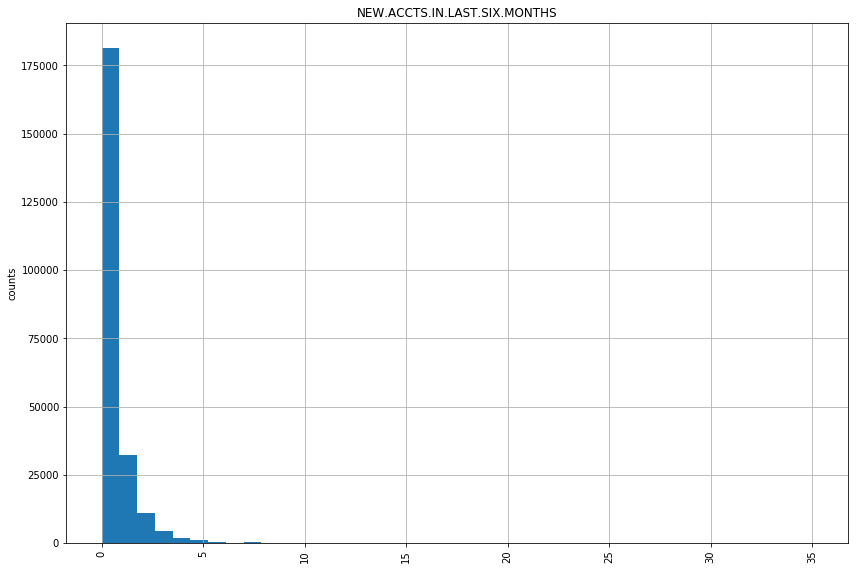

<Figure size 432x288 with 0 Axes>

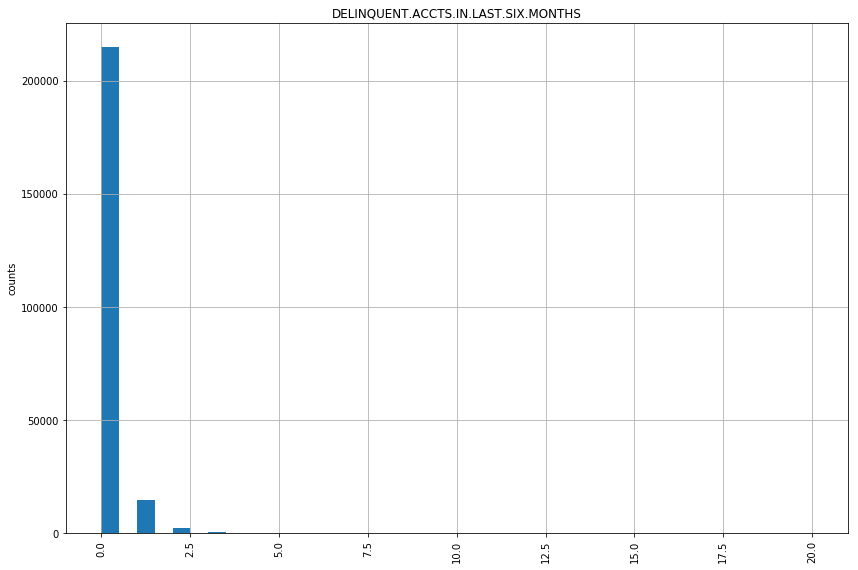

<Figure size 432x288 with 0 Axes>

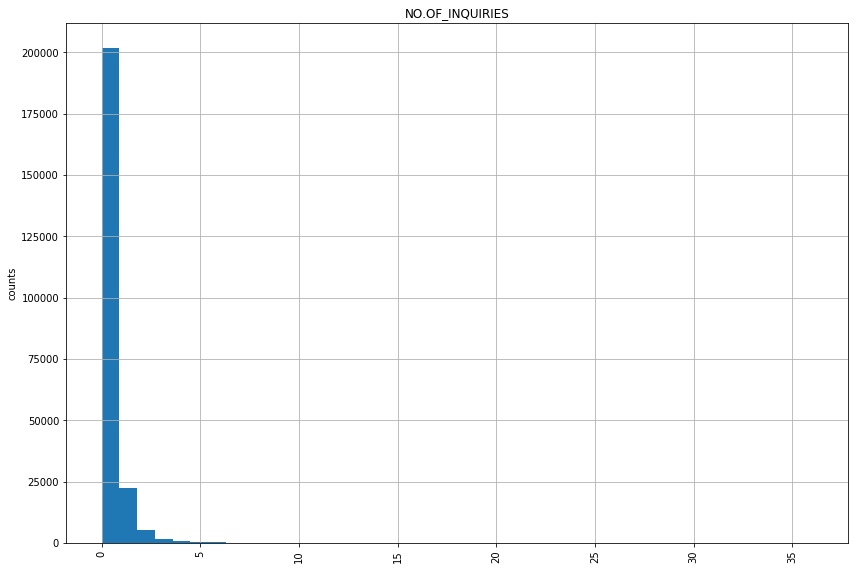

<Figure size 432x288 with 0 Axes>

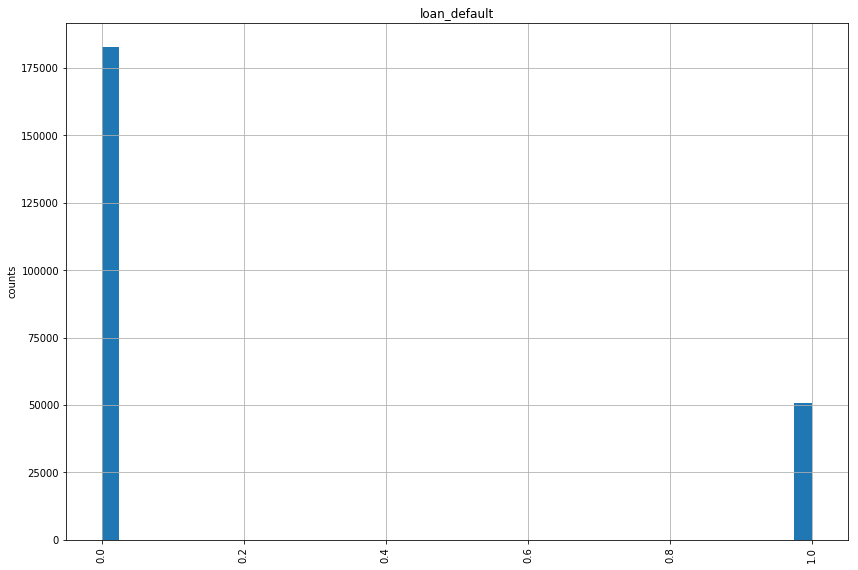

In [51]:
def hist_all_values():
    df1=tr.drop('UniqueID',axis=1)
    cols=tr.columns
    for col in cols:
        if (tr[col].dtypes !='object'):

            fig1=plt.figure()
            tr.hist(column=col,grid=True, figsize=(12,8),bins=40)
            plt.title(col)
            plt.ylabel('counts')
            plt.xticks(rotation = 90)
            plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
            plt.show()
            
hist_all_values()

The histograms above are created to visualize the basics of all feature in train data to know customers general background like if they are from  same county,have same LTV or already have loan default history , etc..

#### Visualizing the test data

In [52]:
ts.reset_index(inplace=True)

In [53]:
ts.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


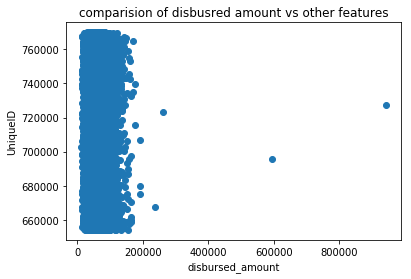

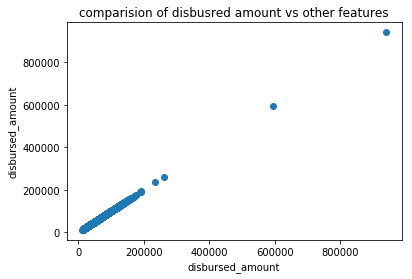

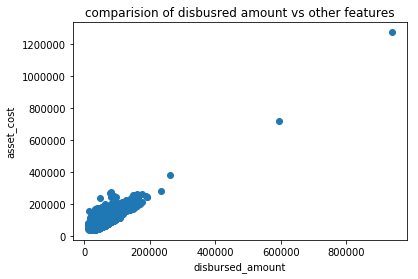

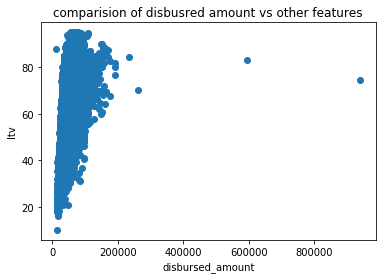

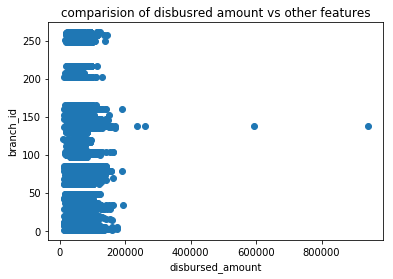

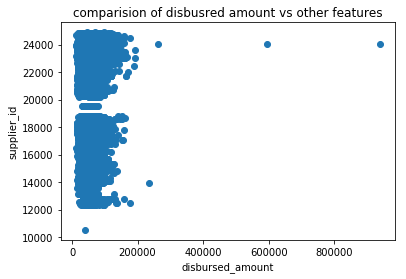

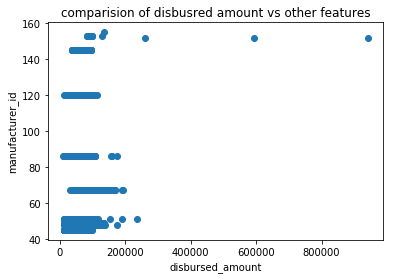

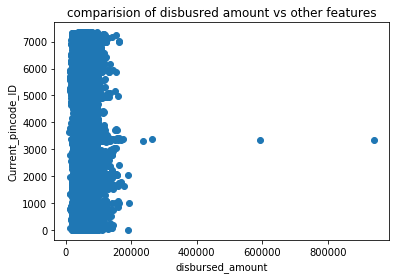

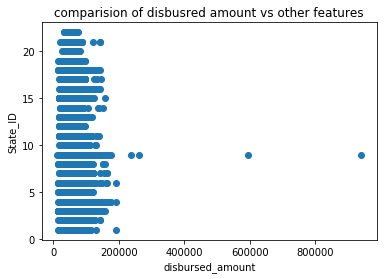

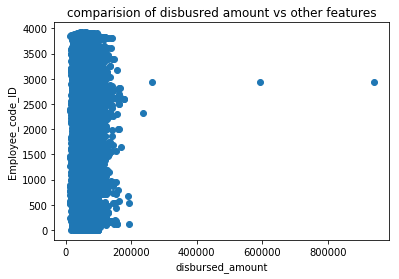

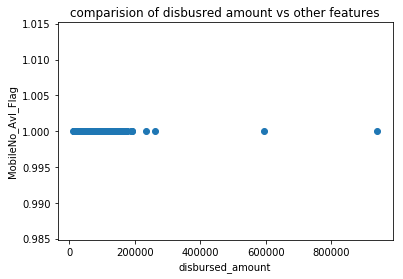

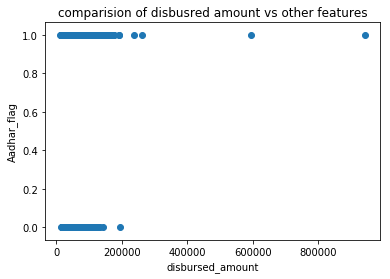

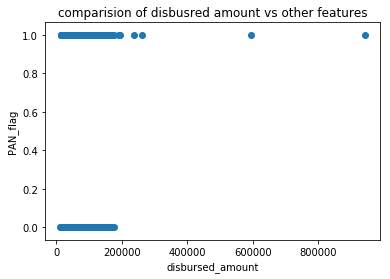

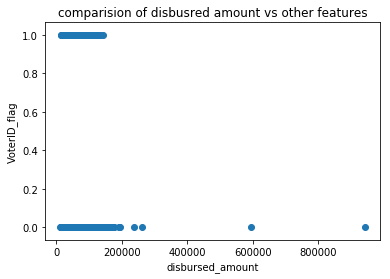

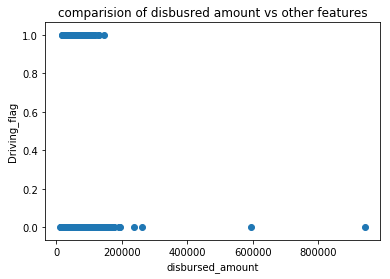

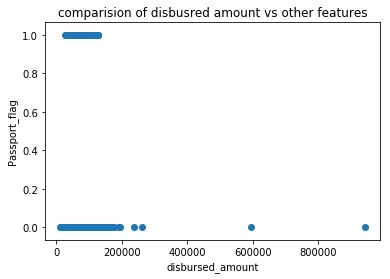

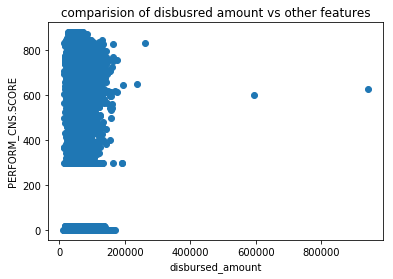

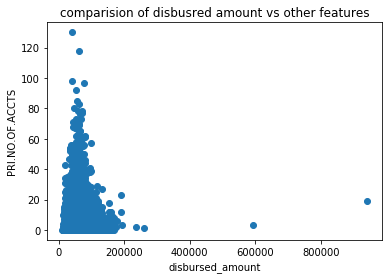

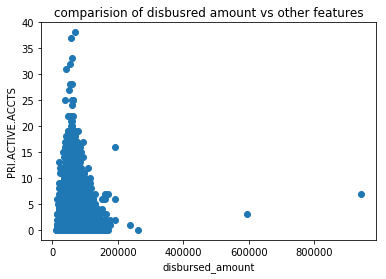

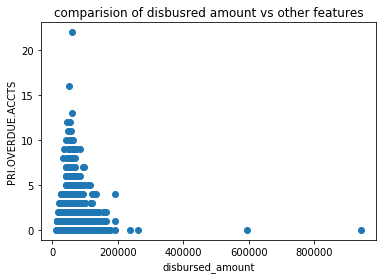

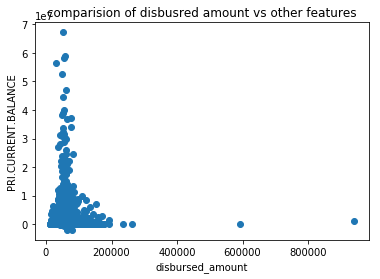

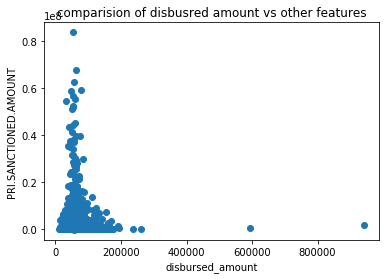

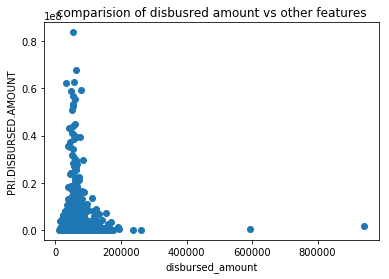

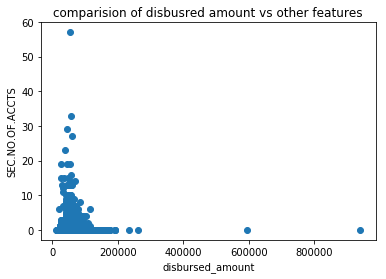

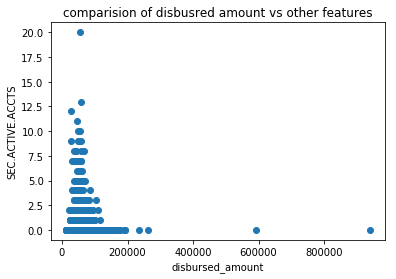

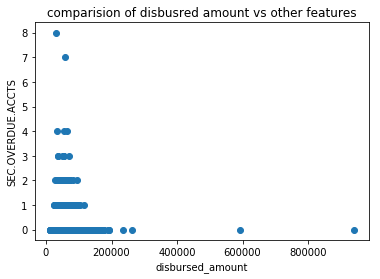

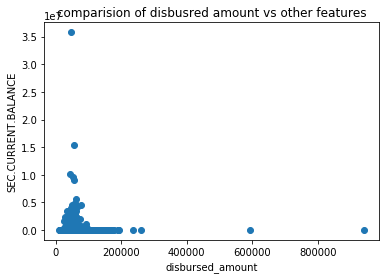

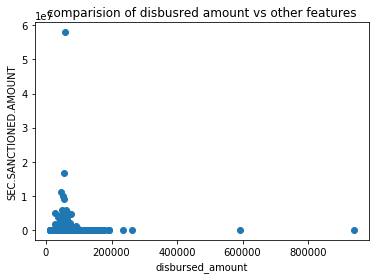

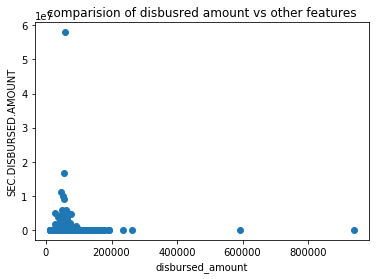

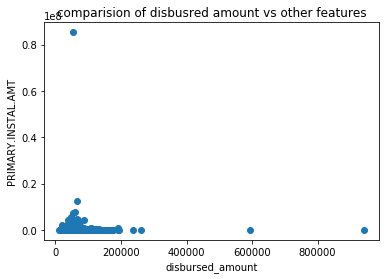

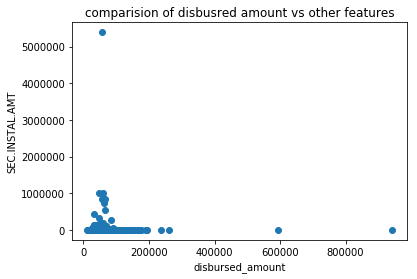

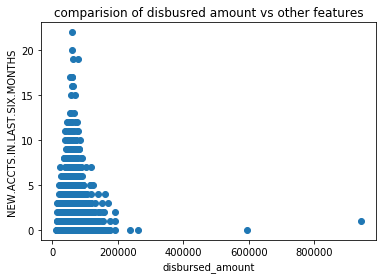

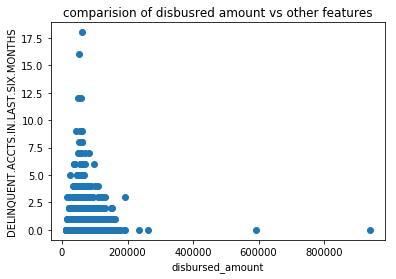

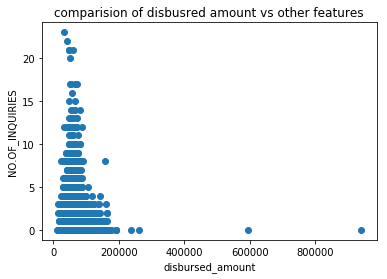

In [54]:
def print_test_values():
    df1=ts.drop('disbursed_amount',axis=1)
    cols=ts.columns
    for col in cols:
        if (ts[col].dtypes !='object'):

            fig1=plt.figure()
            ax1=plt.axes()
            plt.scatter(ts.disbursed_amount,ts[[col]],alpha=1)
            plt.title('comparision of disbusred amount vs other features')
            ax1 = ax1.set(xlabel='disbursed_amount', ylabel=col)
            plt.show()
            
            
print_test_values()

The above graphs are scatterplot to check the impact on different features w.r.t disbusred amount for test data. This helps majorly to check the category of disbursed_amount range which are more prone to default and the LTV on their respective loans.

<Figure size 432x288 with 0 Axes>

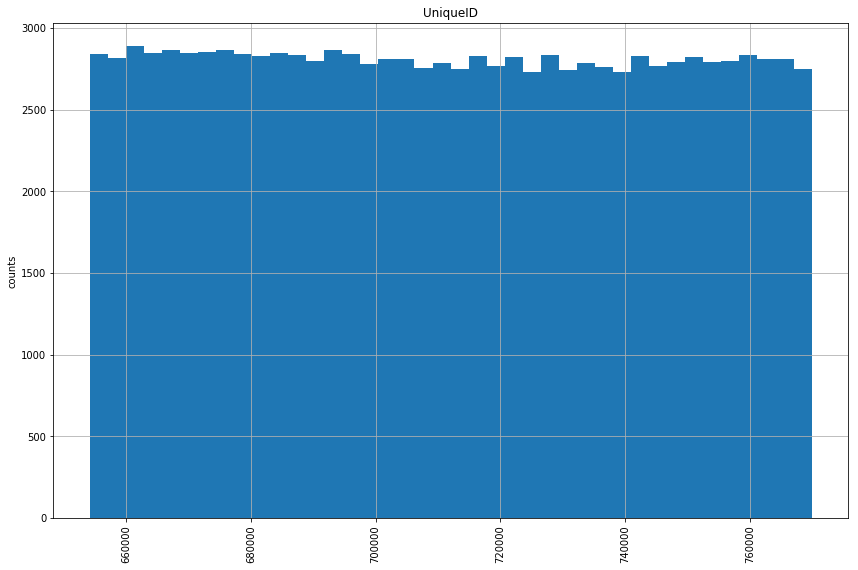

<Figure size 432x288 with 0 Axes>

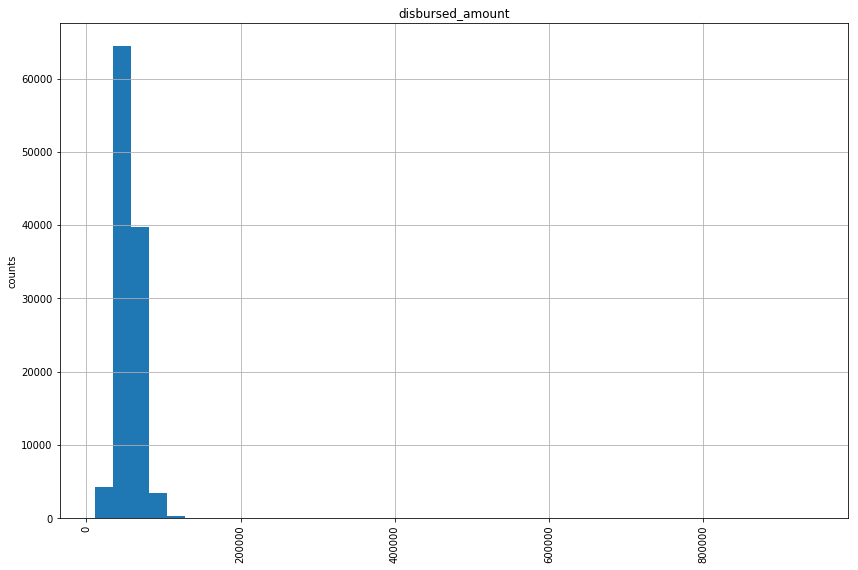

<Figure size 432x288 with 0 Axes>

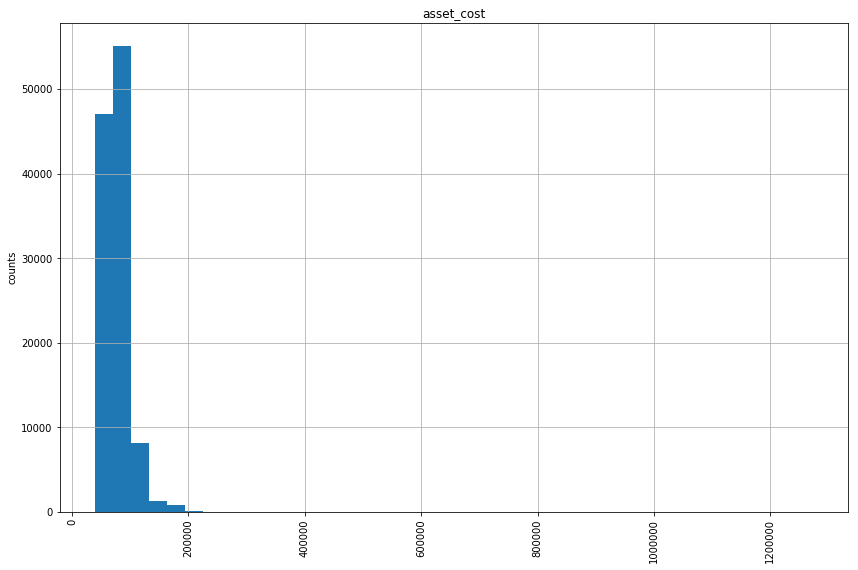

<Figure size 432x288 with 0 Axes>

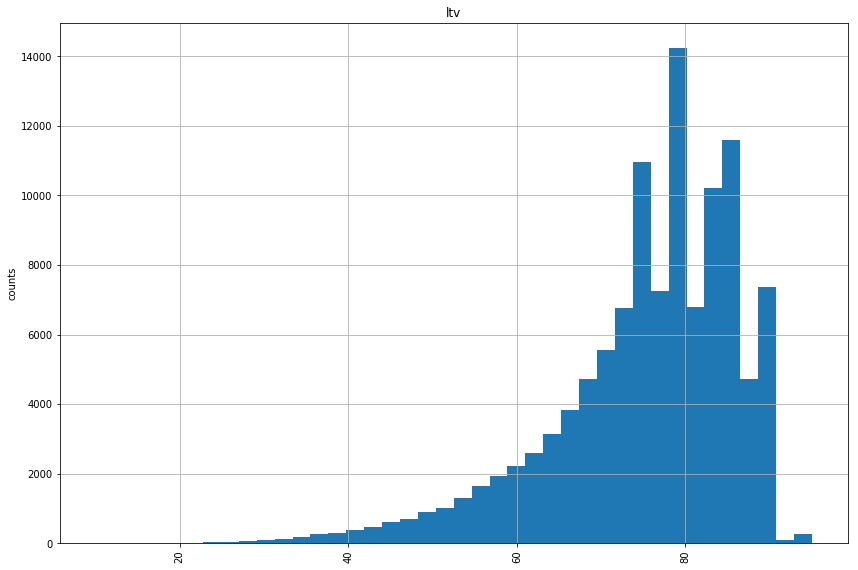

<Figure size 432x288 with 0 Axes>

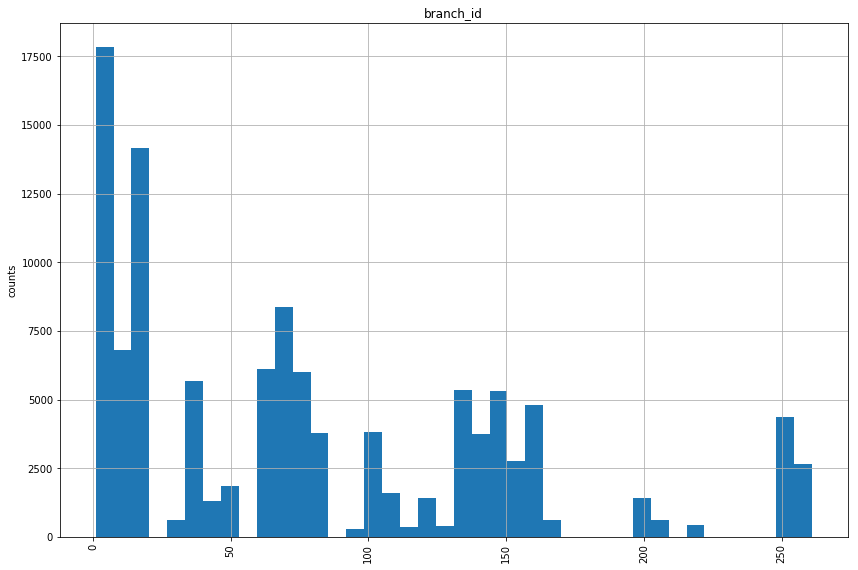

<Figure size 432x288 with 0 Axes>

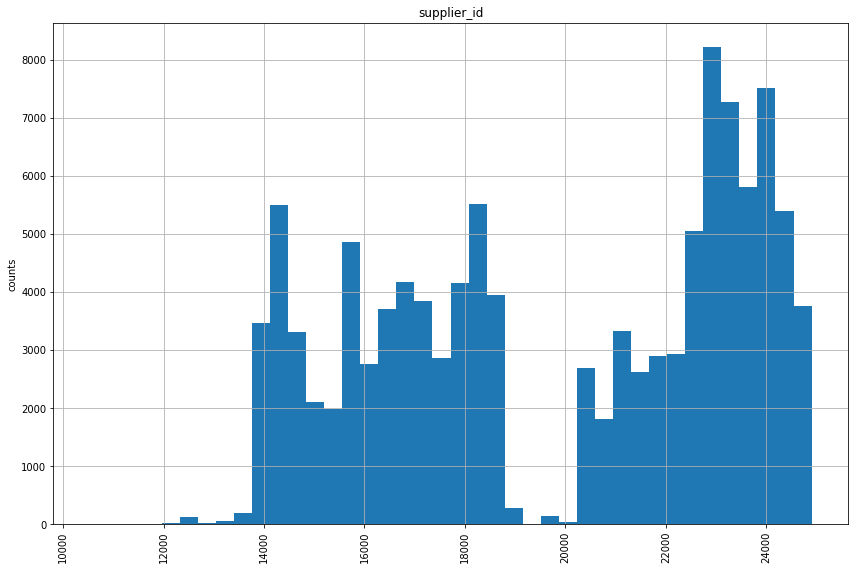

<Figure size 432x288 with 0 Axes>

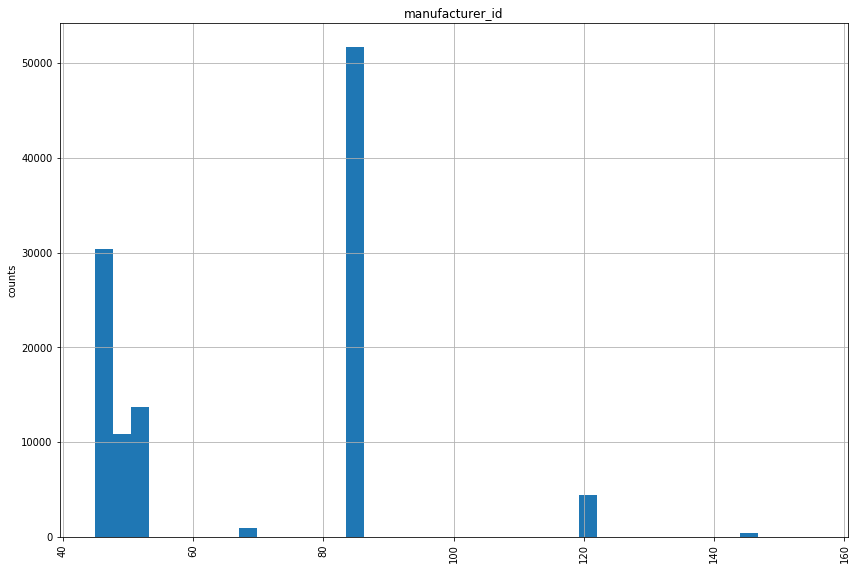

<Figure size 432x288 with 0 Axes>

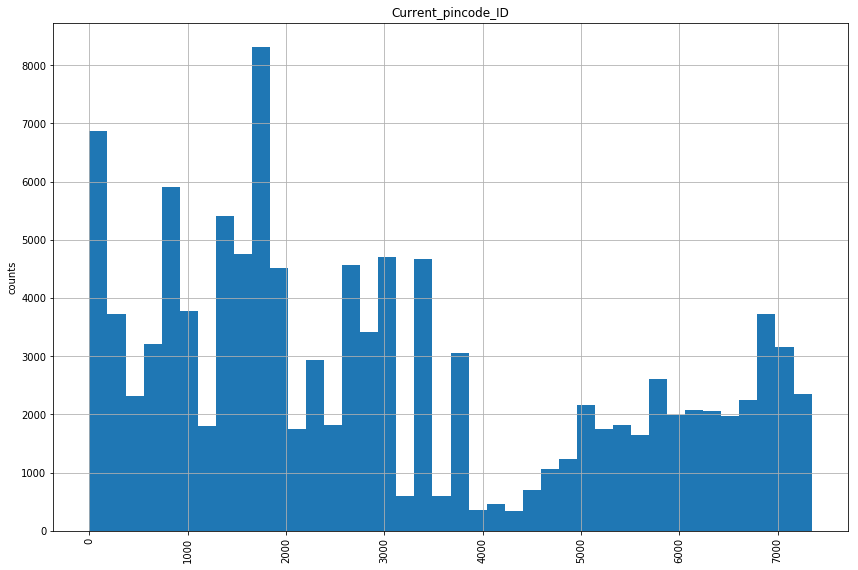

<Figure size 432x288 with 0 Axes>

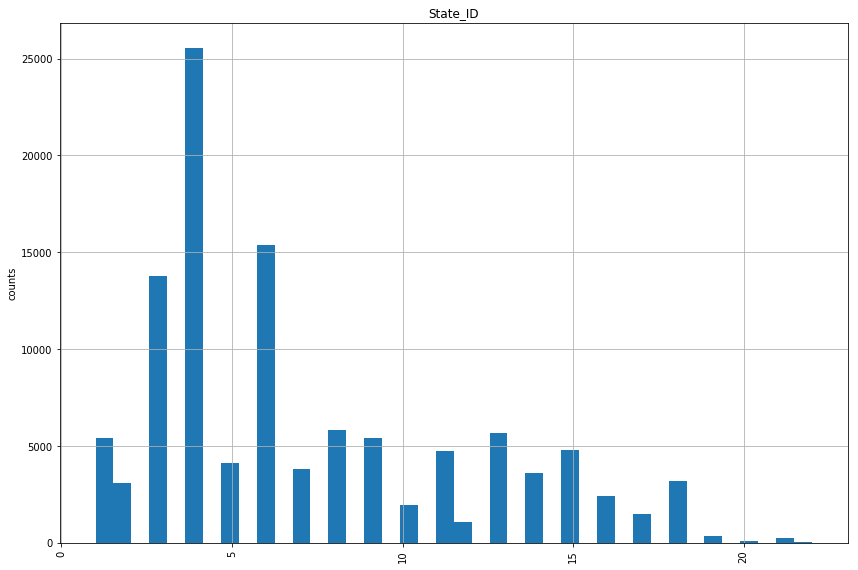

<Figure size 432x288 with 0 Axes>

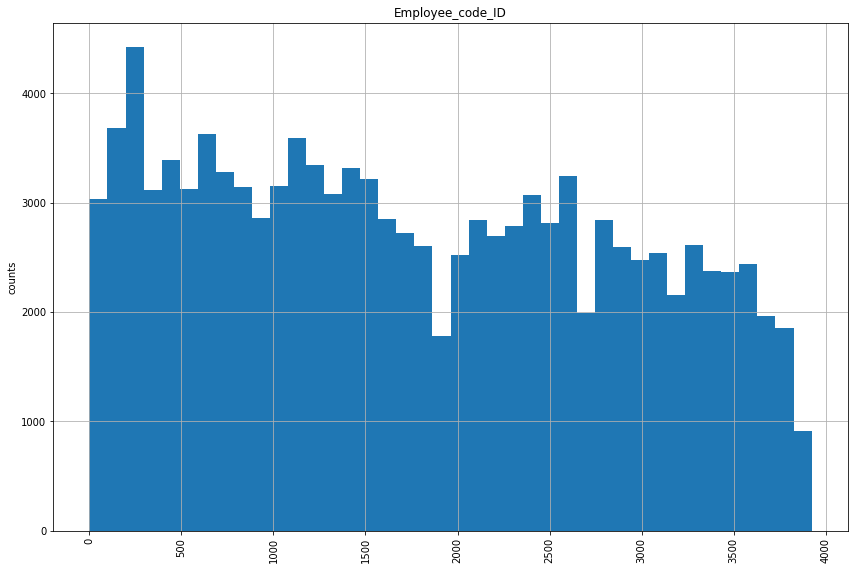

<Figure size 432x288 with 0 Axes>

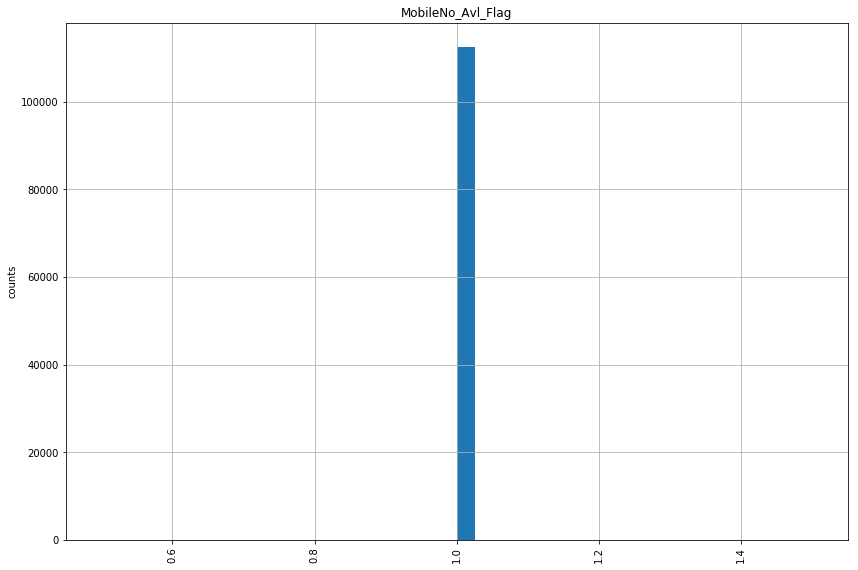

<Figure size 432x288 with 0 Axes>

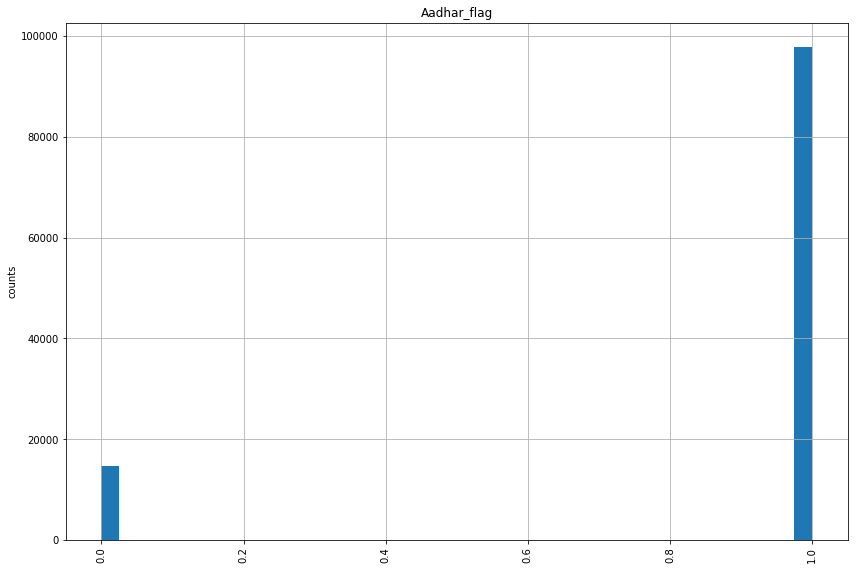

<Figure size 432x288 with 0 Axes>

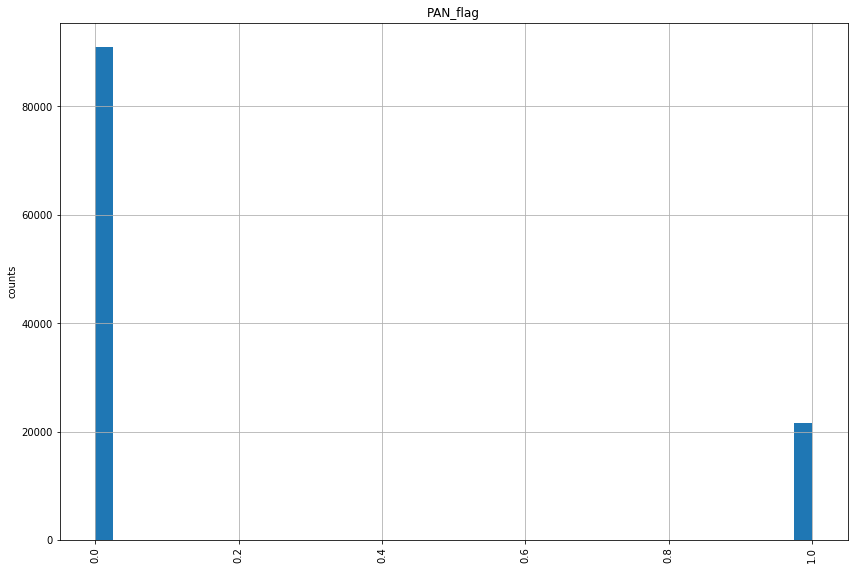

<Figure size 432x288 with 0 Axes>

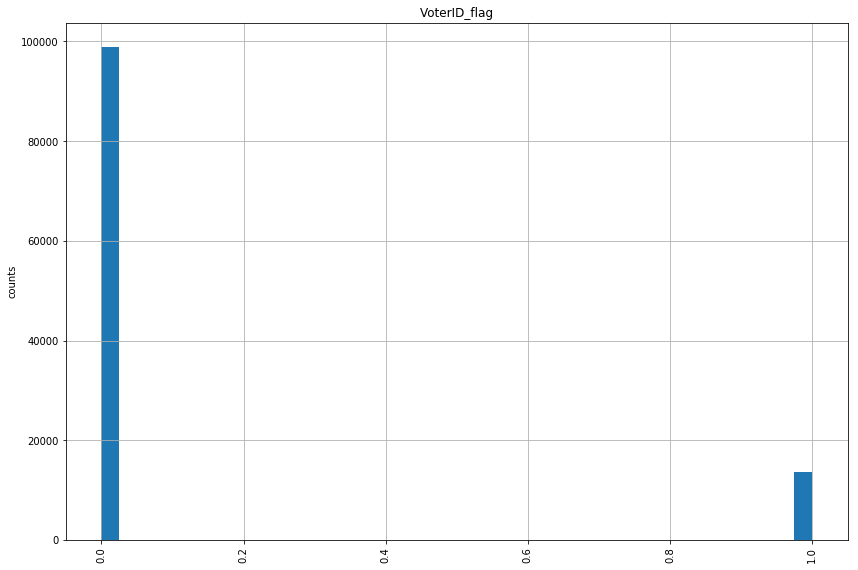

<Figure size 432x288 with 0 Axes>

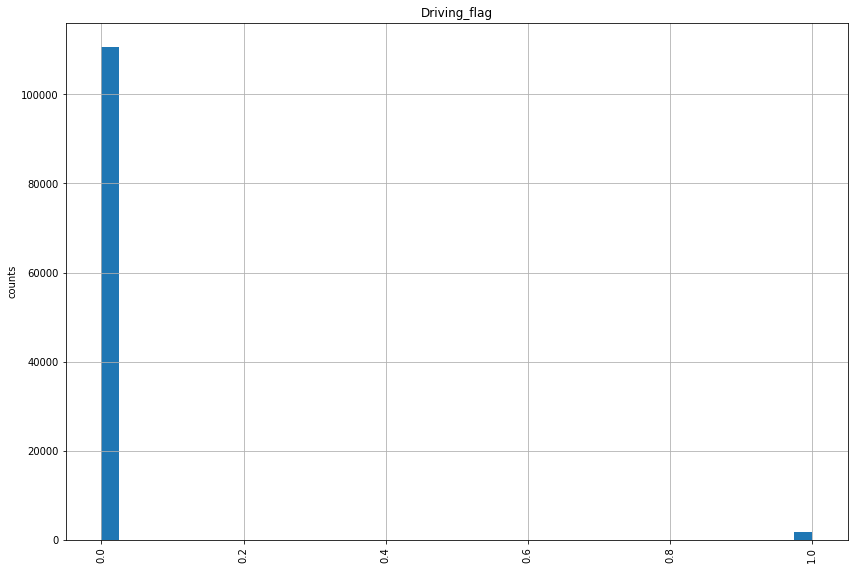

<Figure size 432x288 with 0 Axes>

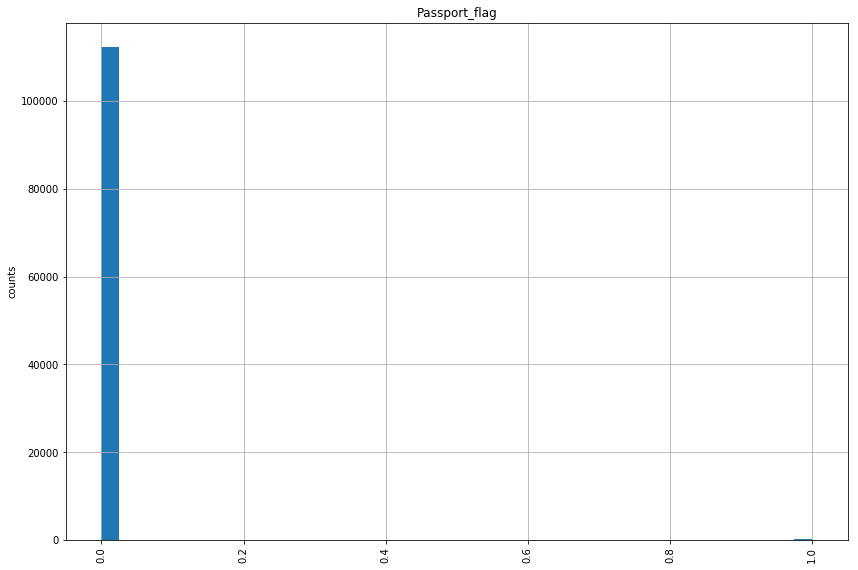

<Figure size 432x288 with 0 Axes>

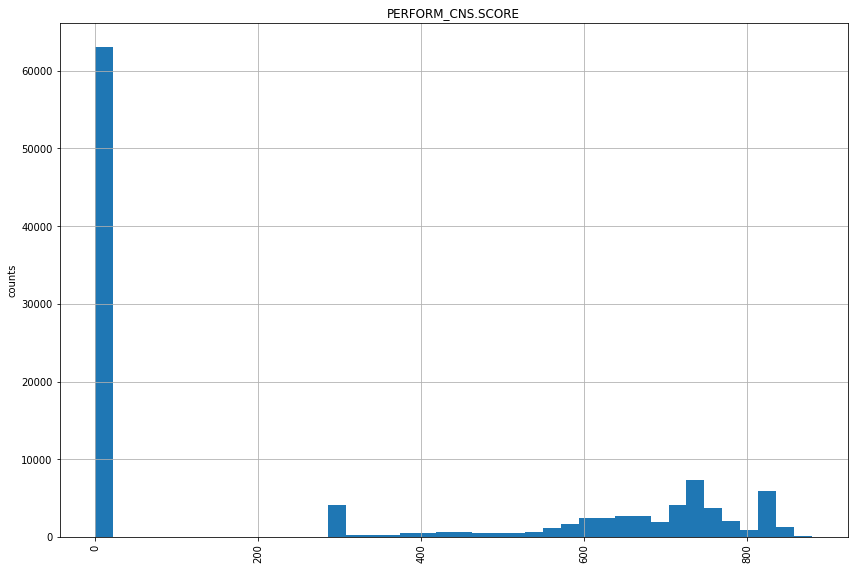

<Figure size 432x288 with 0 Axes>

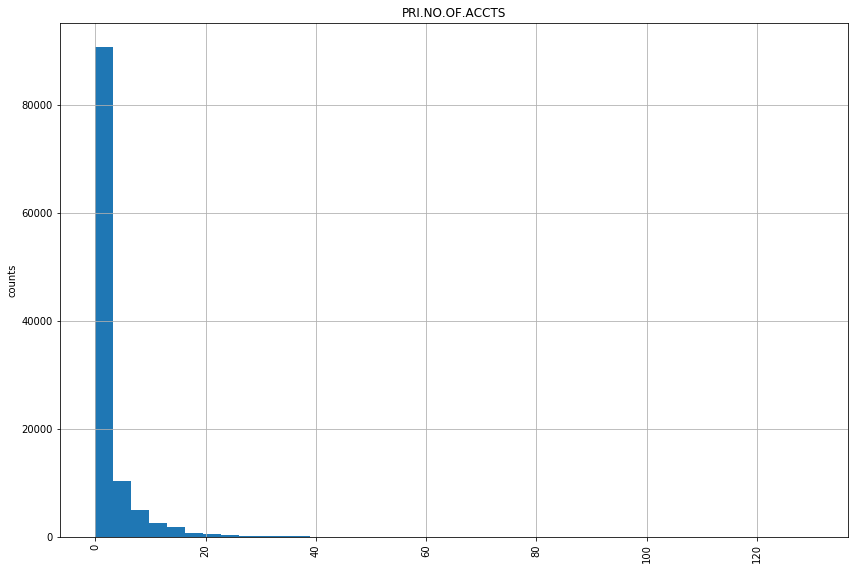

<Figure size 432x288 with 0 Axes>

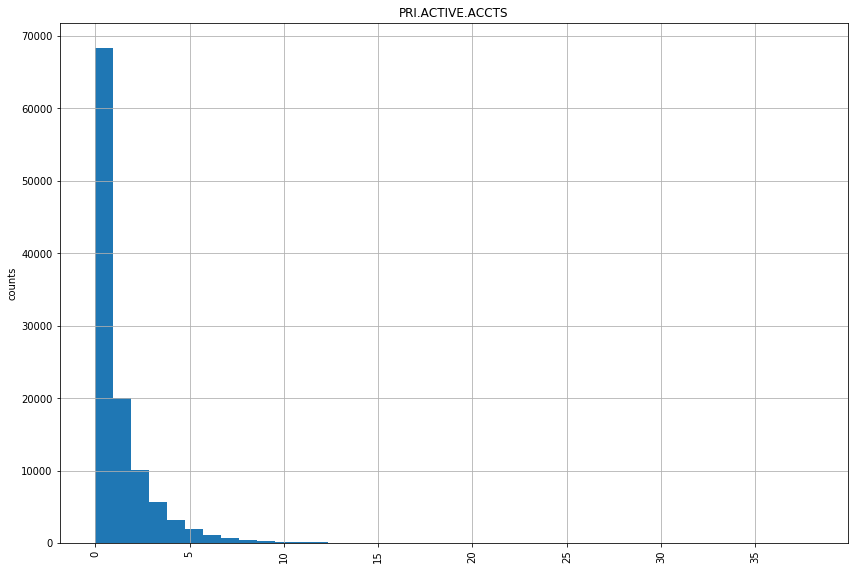

<Figure size 432x288 with 0 Axes>

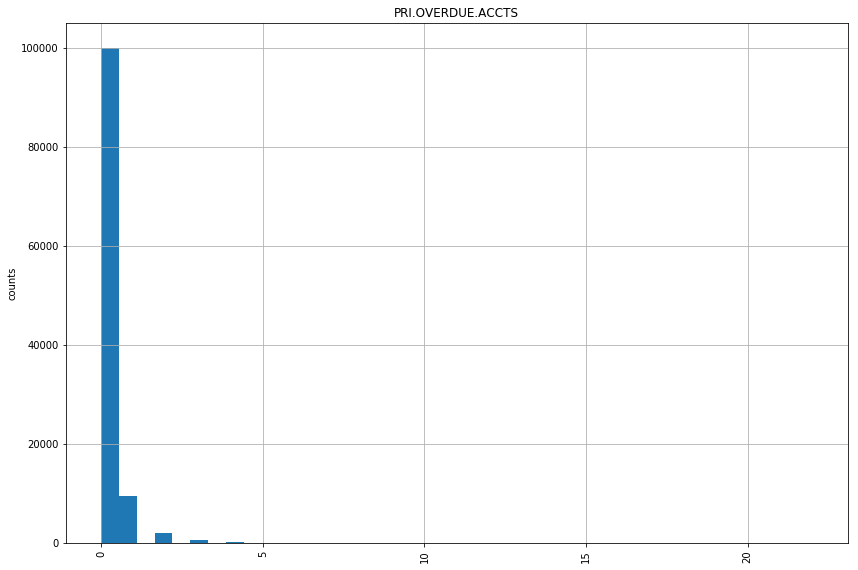

<Figure size 432x288 with 0 Axes>

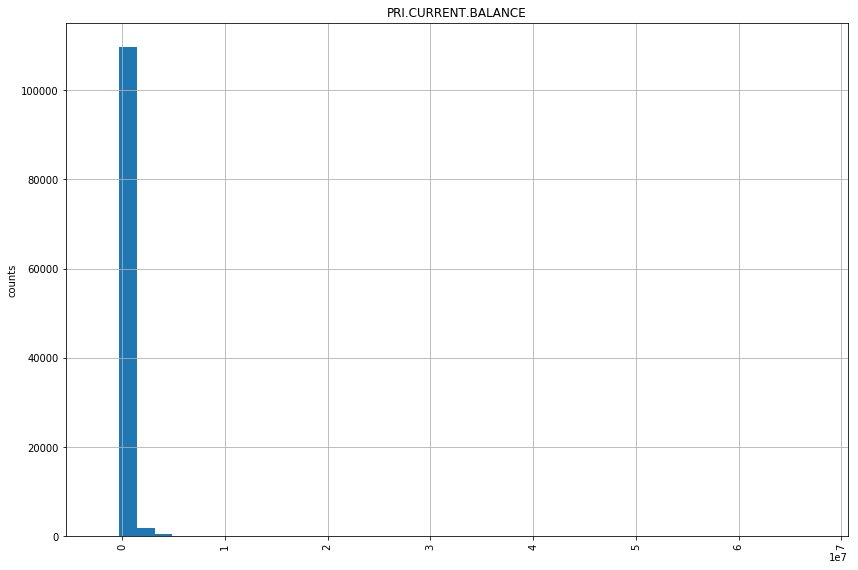

<Figure size 432x288 with 0 Axes>

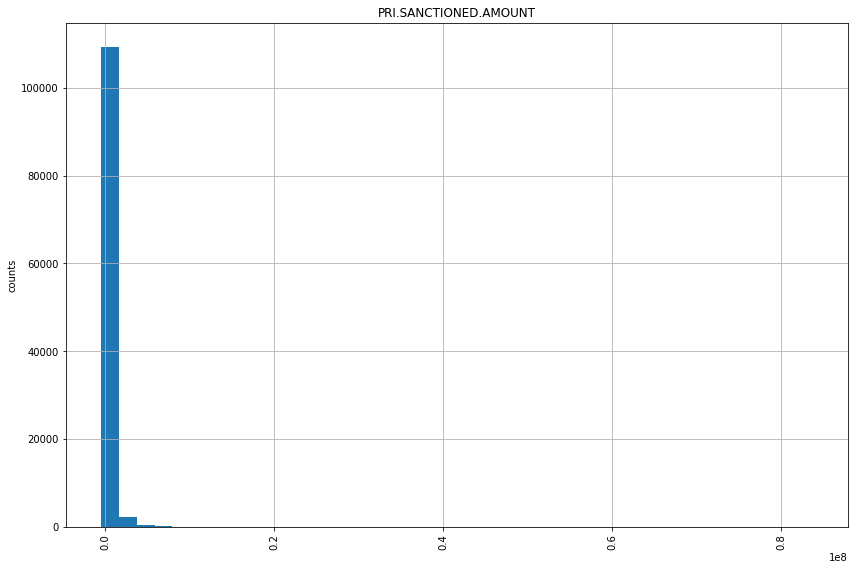

<Figure size 432x288 with 0 Axes>

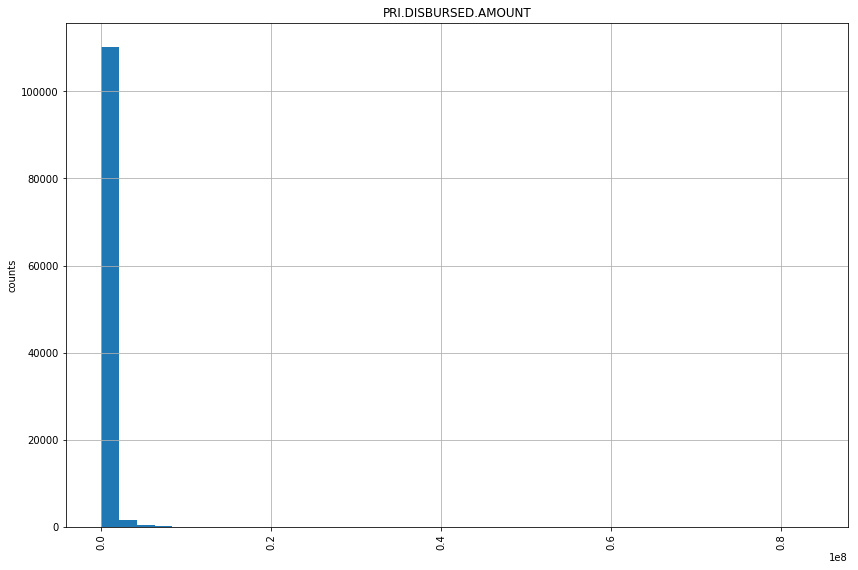

<Figure size 432x288 with 0 Axes>

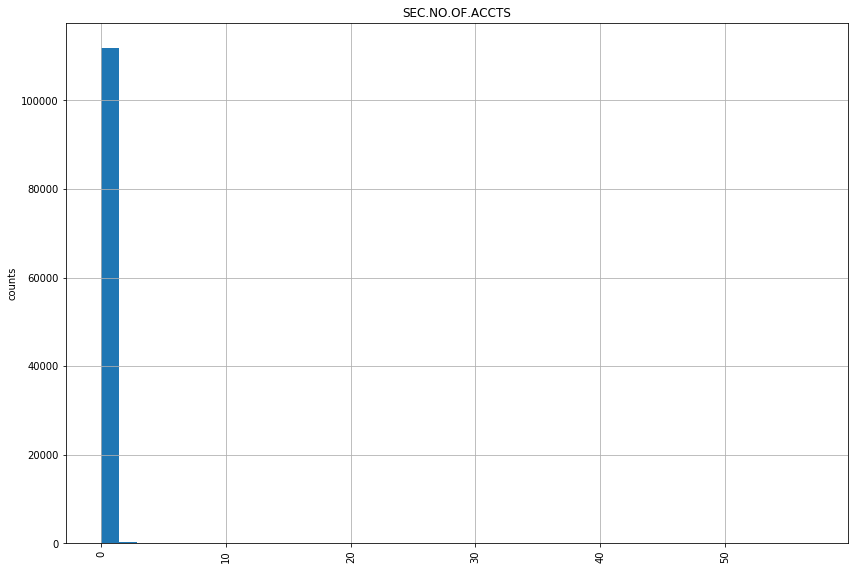

<Figure size 432x288 with 0 Axes>

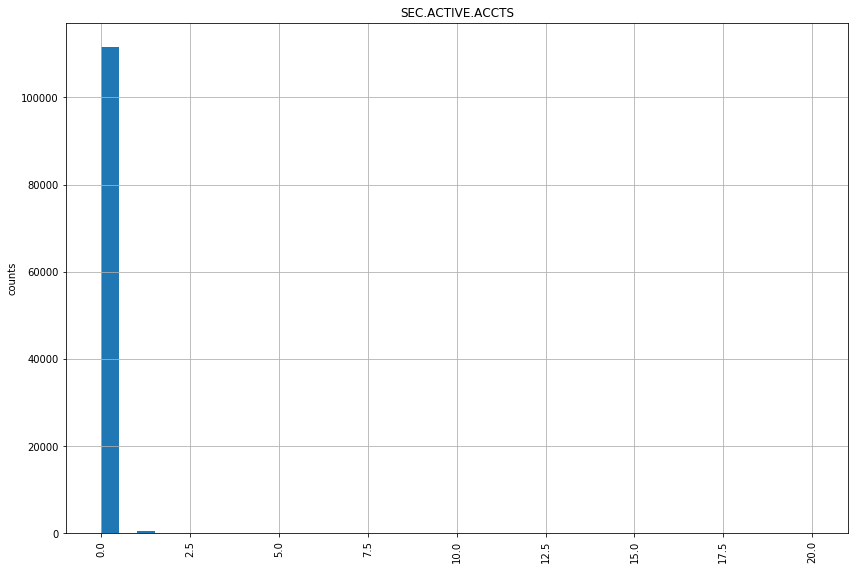

<Figure size 432x288 with 0 Axes>

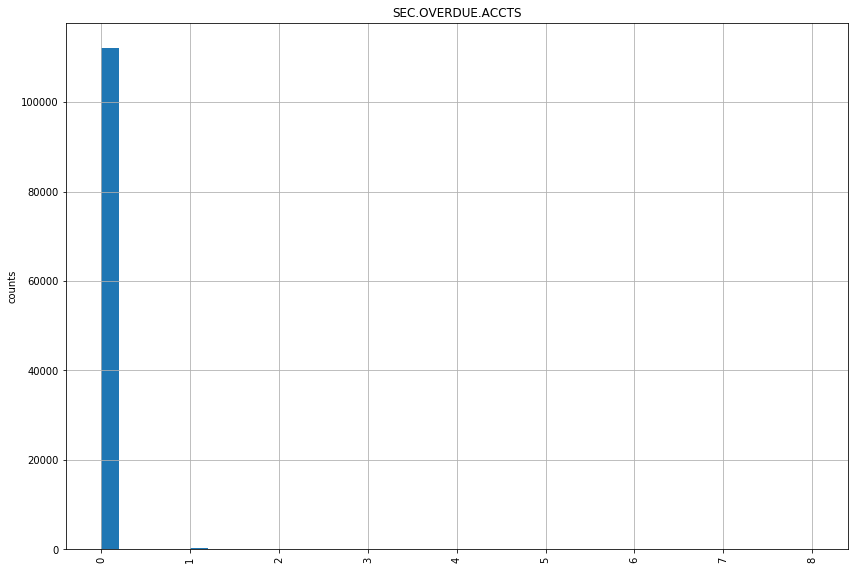

<Figure size 432x288 with 0 Axes>

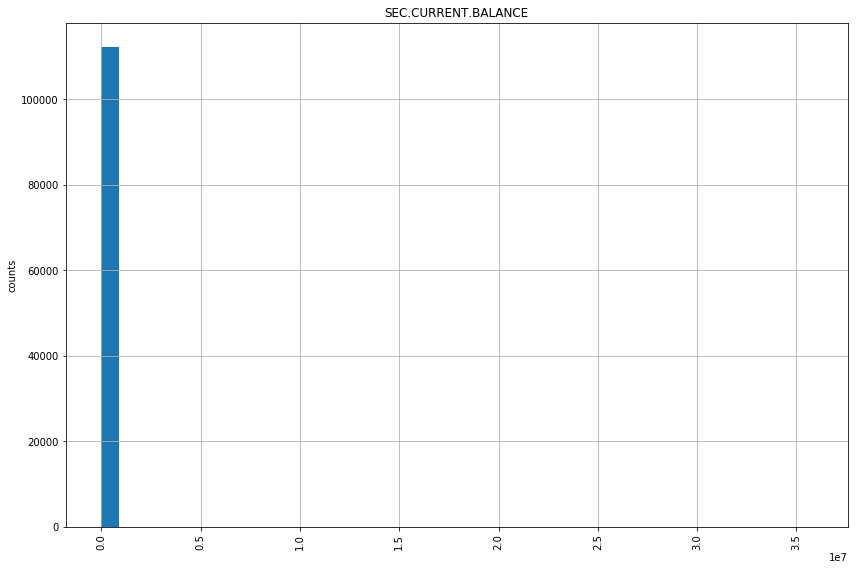

<Figure size 432x288 with 0 Axes>

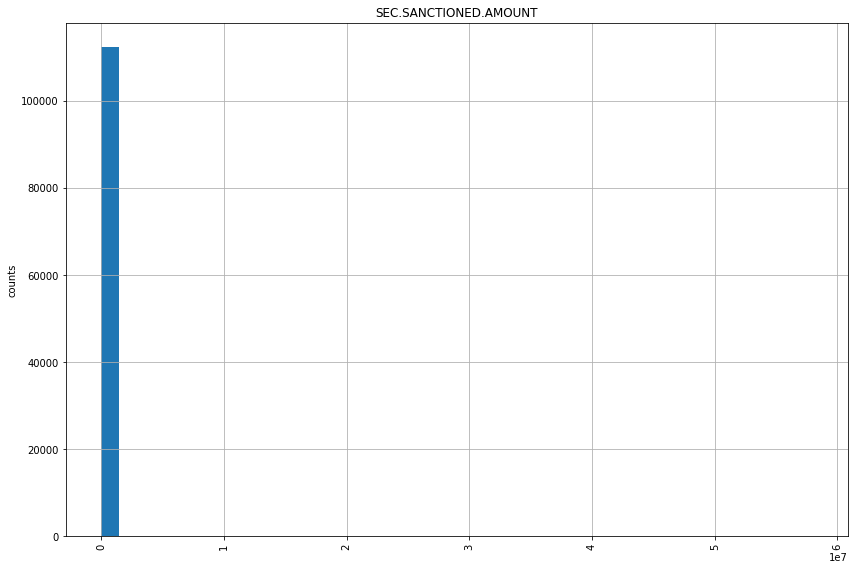

<Figure size 432x288 with 0 Axes>

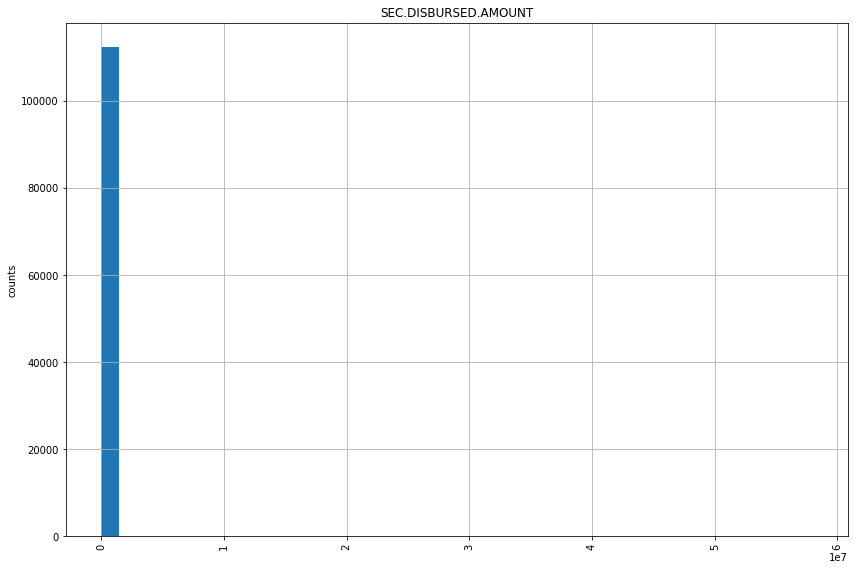

<Figure size 432x288 with 0 Axes>

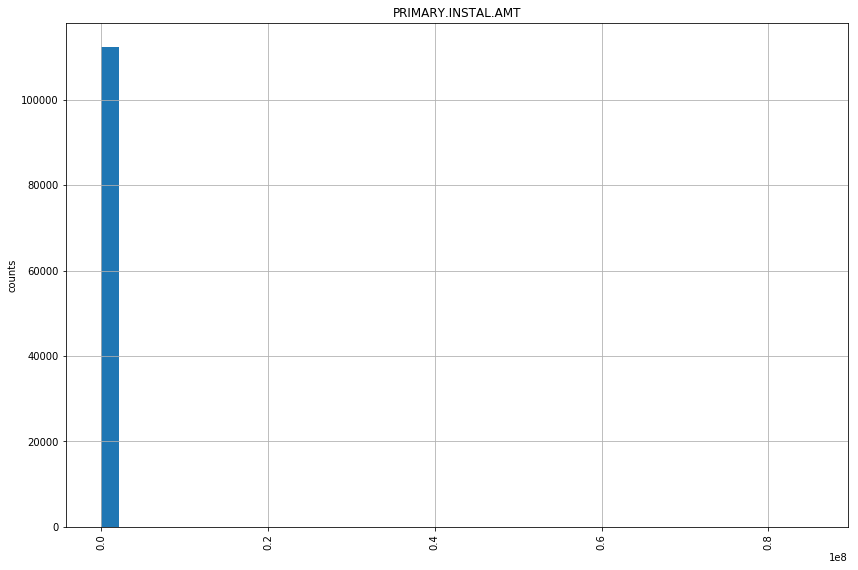

<Figure size 432x288 with 0 Axes>

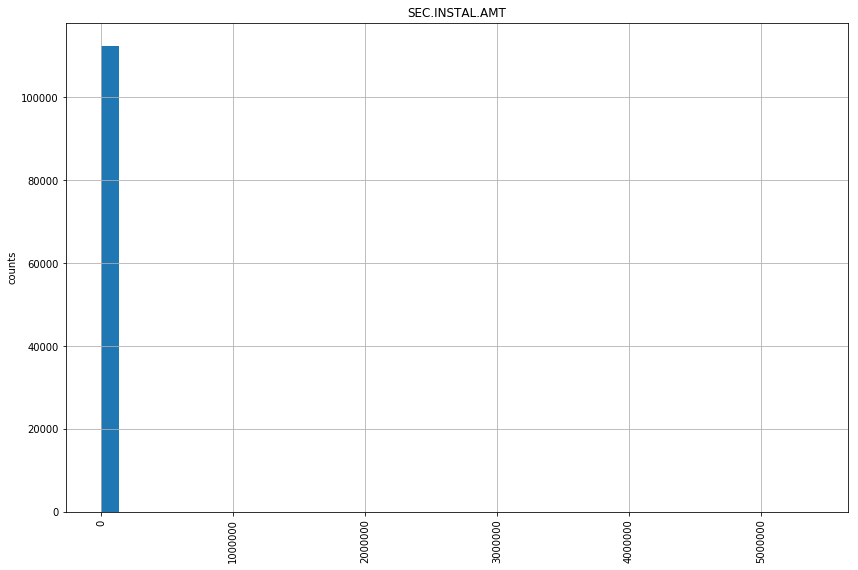

<Figure size 432x288 with 0 Axes>

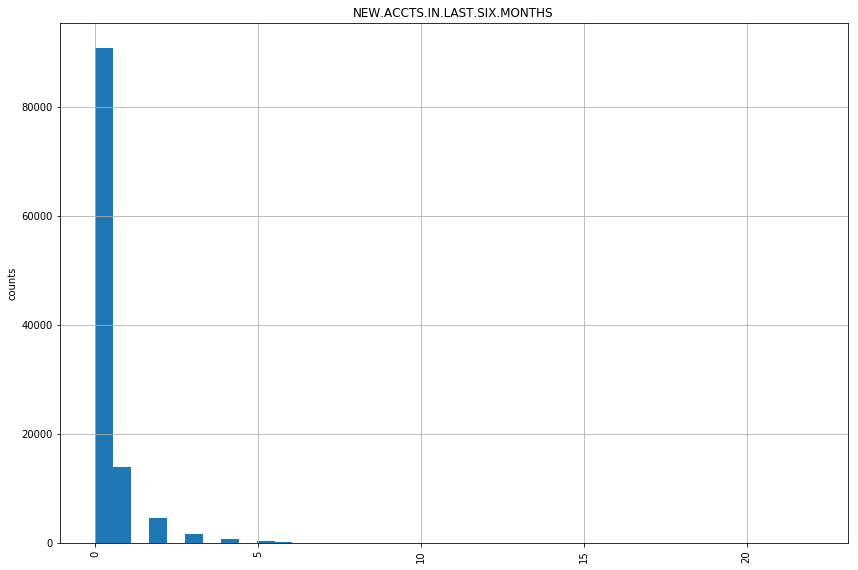

<Figure size 432x288 with 0 Axes>

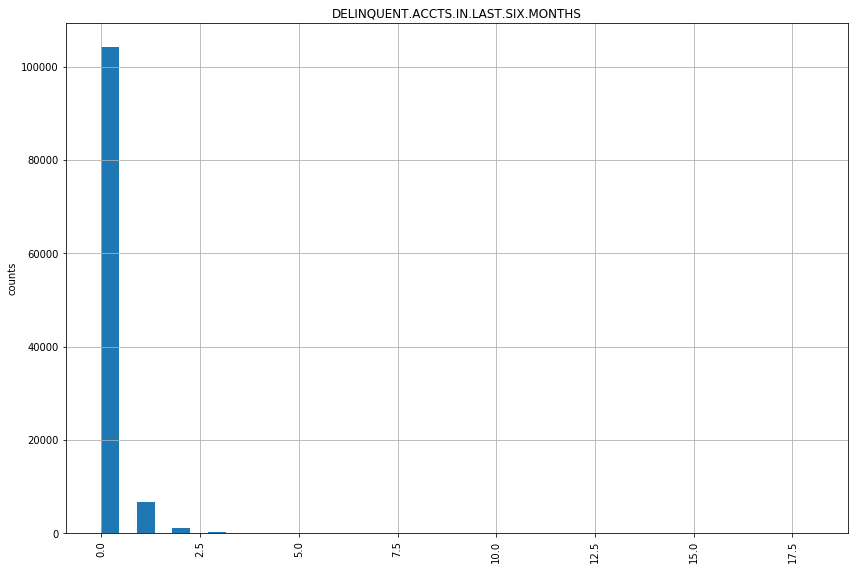

<Figure size 432x288 with 0 Axes>

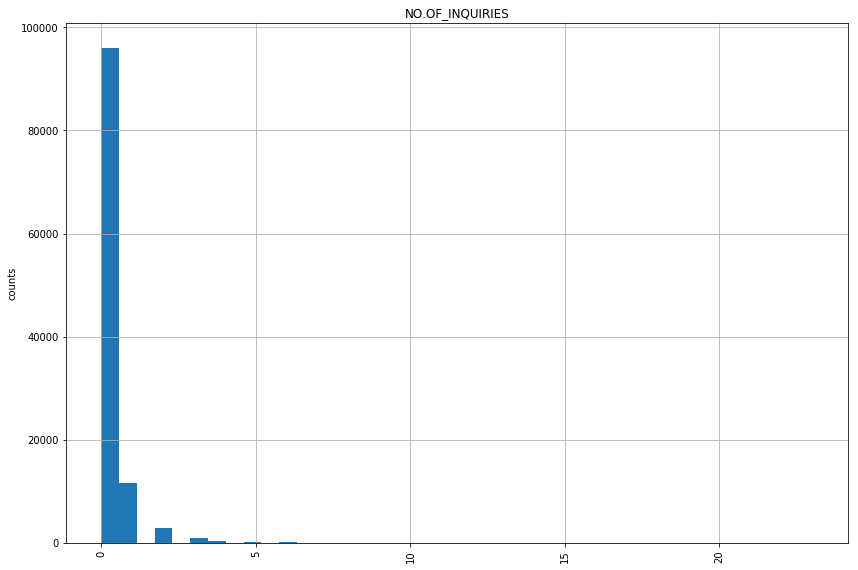

In [55]:
def hist_test_values():
    df1=ts.drop('UniqueID',axis=1)
    cols=ts.columns
    for col in cols:
        if (ts[col].dtypes !='object'):

            fig1=plt.figure()
            ts.hist(column=col,grid=True, figsize=(12,8),bins=40)
            plt.title(col)
            plt.ylabel('counts')
            plt.xticks(rotation = 90)
            plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
            plt.show()
            
hist_test_values()

The histograms above are created to visualize the basics of all feature in test data to know customers general background like if they are from  same county,have same LTV or already have loan default history , etc..

From the scatter plot and histogram we can easiy interpret that mostly the accounts which wre provided loan were around the november month of the year 2018 and still there are some deliquents accounts which means some have already made loan defaults.

The anomalies would be that te risk of loan default increases as the age of the person increases, but as per the data provide there are loan default by people with almost age group as young as born in year 1993.


There is no way to compare the relatred quatities as the probability of default doesnot only remains on one of the factor but it varies as per the many factors acting as features for the profile.

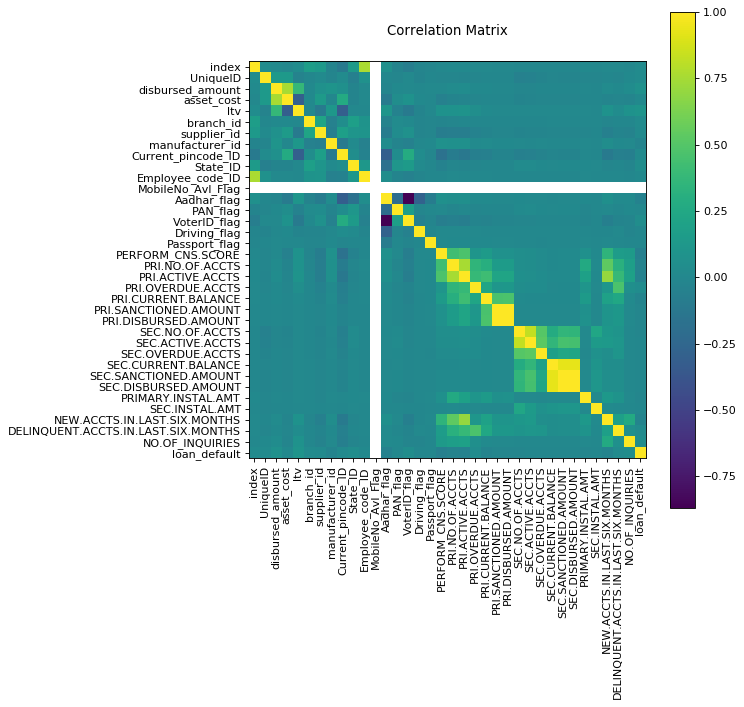

In [56]:
correlationplot(tr,8)

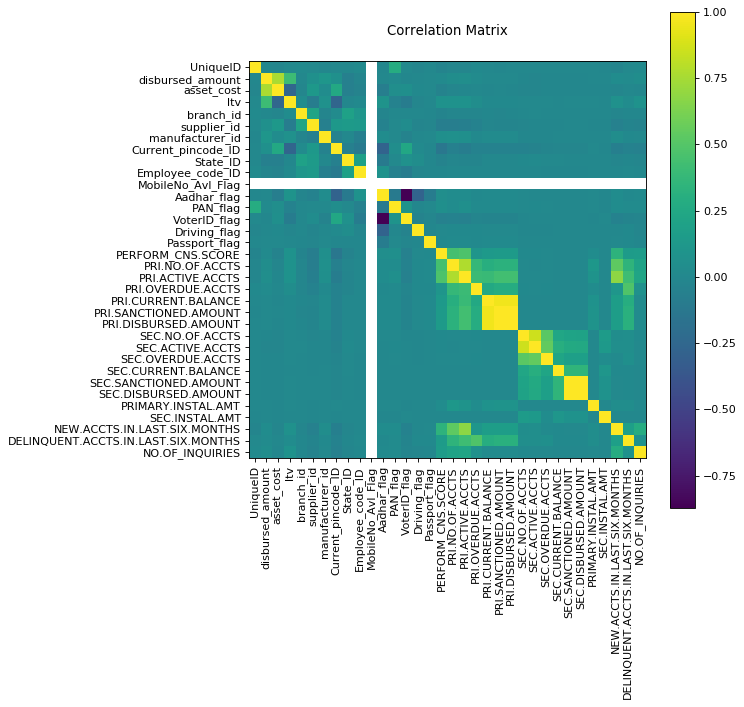

In [57]:
correlationplot(ts,8)

Missing values are shown by the white lines.

From the above correlation matrix we can observe that the loan default is highly correlated with number of inquiries and number of overdue accounts.

Other question can be asked as the disbursed amount should also be related highly with the chance of loan default. Though it affects the chances but the correlation matrix cleraly depicts that the account with previous default history are risky and the loan should be provided to them with more caution.

In [58]:
tr.head()

,index,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [59]:
ts.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-74,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-85,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-95,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-73,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-72,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [60]:
print(tr.shape)
print(ts.shape)

(233154, 42)
(112392, 40)


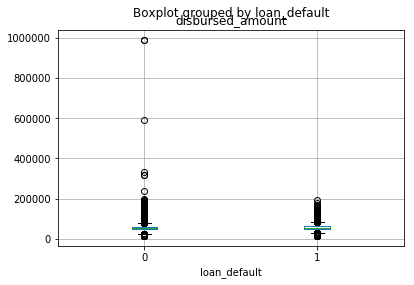

In [61]:
tr.boxplot(column='disbursed_amount', by='loan_default')

Above boxplot refelcts that the major loan default are reported in the loan disbursed amount under $2,00,000

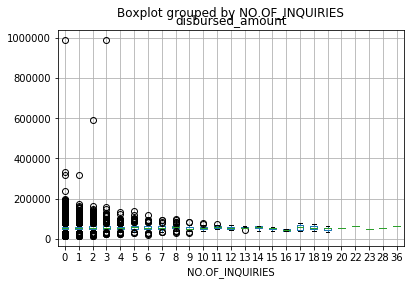

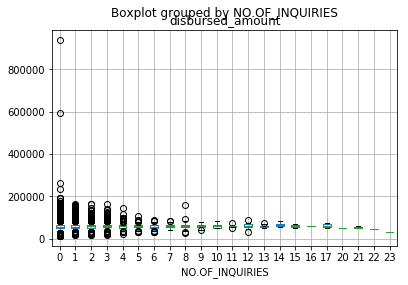

In [62]:
tr.boxplot(column='disbursed_amount', by='NO.OF_INQUIRIES')
ts.boxplot(column='disbursed_amount', by='NO.OF_INQUIRIES')

The above boxplot graph is made to check the no. of inquries of customers for both test and train dataset

In [63]:
tr.head()

,index,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [64]:
# creating a function to split the credit risk into risk grade and risk type
def credit_risk(tr):
    d1=[]
    d2=[]
    for i in tr:
        a = i.split("-")
        if len(a) == 1:
            d1.append(a[0])
            d2.append('unknown')
        else:
            d1.append(a[1])
            d2.append(a[0])

    return d1,d2

In [65]:
def calc_number_of_ids(row):
#     print(type(row), row.size)
    return sum(row[['Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag']])
def check_pri_installment(row):
    if row['PRIMARY.INSTAL.AMT']<=1:
        return 0
    else:
        return row['PRIMARY.INSTAL.AMT']

In [66]:
# Now converting the Score description into number rating from 0 to -5

risk_map = {'No Bureau History Available':-1, 
              'Not Scored: No Activity seen on the customer (Inactive)':-1,
              'Not Scored: Sufficient History Not Available':-1,
              'Not Scored: No Updates available in last 36 months':-1,
              'Not Scored: Only a Guarantor':-1,
              'Not Scored: More than 50 active Accounts found':-1,
              'Not Scored: Not Enough Info available on the customer':-1,
              'Very Low Risk':4,
              'Low Risk':3,
              'Medium Risk':2, 
              'High Risk':1,
              'Very High Risk':0}

#Have used the grading system in descending order because A is least risky and going forward risk increases
sub_risk = {'unknown':-1, 'I':5, 'L':2, 'A':13, 'D':10, 'M':1, 'B':12, 'C':11, 'E':9, 'H':6, 'F':8, 'K':3,
       'G':7, 'J':4}

#Firstly converting the employment type to numbers:

employment_map = {'Self employed':0, 'Salaried':1, 'NAN':-1}


In [67]:
def features_engineering(df):
    

# Now converting the Date of birth of customers into the age and creating a new feature age:

    df['Date.of.Birth'] = pd.to_datetime(df['Date.of.Birth'], format = "%d-%m-%y")
    now = pd.Timestamp('now')
    df['Age'] = (now - df['Date.of.Birth']).astype('<m8[Y]').astype(int)
    age_mean = int(df[df['Age']>0]['Age'].mean())
    df.loc[:,'age'] = df['Age'].apply(lambda x: x if x>0 else age_mean)

# Now converting the Disbursal date of loan into no. of month passed from disbural month.

    df['DisbursalDate'] = pd.to_datetime(df['DisbursalDate'], format = "%d-%m-%y")
    df['disbursal_months_passed'] = ((now - df['DisbursalDate'])/np.timedelta64(1,'M')).astype(int)

#Now converting AVERAGE.ACCT.AGE into number of months :
    df['average_act_age_in_months'] = df['AVERAGE.ACCT.AGE'].apply(lambda x : int(re.findall(r'\d+',x)[0])*12 + int(re.findall(r'\d+',x)[1]))

# Now Converting CREDIT.HISTORY.LENGTH into number of months:

    df['credit_history_length_in_months'] = df['CREDIT.HISTORY.LENGTH'].apply(lambda x : int(re.findall(r'\d+',x)[0])*12 + int(re.findall(r'\d+',x)[1]))

#adding a feature of number of zeroes present in a row so that we can count how many zeroes on row has

    df['number_of_0'] = (df == 0).astype(int).sum(axis=1)
    
#creating additional column to split the PERFORM_CNS.SCORE.DESCRIPTION using credit risk function defined above

    df.loc[:,'credit_risk'],df.loc[:,'credit_risk_grade']  = credit_risk(df["PERFORM_CNS.SCORE.DESCRIPTION"])

#adding loan to asset ratio to check which if the clients with default had suufficient assets to repay loan at time of disbursement

    df.loc[:, 'loan_to_asset_ratio'] = df['disbursed_amount'] /df['asset_cost']

#adding total number of accounts feature:

    df.loc[:,'no_of_accts'] = df['PRI.NO.OF.ACCTS'] + df['SEC.NO.OF.ACCTS']

#Now adding columns carrying total number of  various accounts including the primary and secondary and combing them in one

    df.loc[:,'pri_inactive_accts'] = df['PRI.NO.OF.ACCTS'] - df['PRI.ACTIVE.ACCTS']
    df.loc[:,'sec_inactive_accts'] = df['SEC.NO.OF.ACCTS'] - df['SEC.ACTIVE.ACCTS']
    df.loc[:,'tot_inactive_accts'] = df['pri_inactive_accts'] + df['sec_inactive_accts']
    df.loc[:,'tot_overdue_accts'] = df['PRI.OVERDUE.ACCTS'] + df['SEC.OVERDUE.ACCTS']
    df.loc[:,'tot_current_balance'] = df['PRI.CURRENT.BALANCE'] + df['SEC.CURRENT.BALANCE']
    df.loc[:,'tot_sanctioned_amount'] = df['PRI.SANCTIONED.AMOUNT'] + df['SEC.SANCTIONED.AMOUNT']
    df.loc[:,'tot_disbursed_amount'] = df['PRI.DISBURSED.AMOUNT'] + df['SEC.DISBURSED.AMOUNT']
    df.loc[:,'tot_installment'] = df['PRIMARY.INSTAL.AMT'] + df['SEC.INSTAL.AMT']
    df.loc[:,'bal_disburse_ratio'] = np.round((1+df['tot_disbursed_amount'])/(1+df['tot_current_balance']),2)
    df.loc[:,'pri_tenure'] = (df['PRI.DISBURSED.AMOUNT']/( df['PRIMARY.INSTAL.AMT']+1)).astype(int)
    df.loc[:,'sec_tenure'] = (df['SEC.DISBURSED.AMOUNT']/(df['SEC.INSTAL.AMT']+1)).astype(int)
    df.loc[:,'disburse_to_sactioned_ratio'] =  np.round((df['tot_disbursed_amount']+1)/(1+df['tot_sanctioned_amount']),2)
    df.loc[:,'active_to_inactive_act_ratio'] =  np.round((df['no_of_accts']+1)/(1+df['tot_inactive_accts']),2)
    return df


In [68]:
# adding features for the credit risk and sub risk for which we have described numbers and grades above  
def label_data(df):
    df.loc[:,'credit_risk_label'] = df['credit_risk'].apply(lambda x: risk_map[x])
    df.loc[:,'sub_risk_label'] = df['credit_risk_grade'].apply(lambda x: sub_risk[x])
    return df

In [69]:
def data_correction(df):
    #Many customers have invalid date of birth, so immute invalid data with mean age
    df.loc[:,'PRI.CURRENT.BALANCE'] = df['PRI.CURRENT.BALANCE'].apply(lambda x: 0 if x<0 else x)
    df.loc[:,'SEC.CURRENT.BALANCE'] = df['SEC.CURRENT.BALANCE'].apply(lambda x: 0 if x<0 else x)
    df.loc[:,'employment_label'] = df['Employment.Type'].apply(lambda x: employment_map[x])

    #loan that do not have current pricipal outstanding should have 0 primary installment
    df.loc[:,'new_pri_installment']= df.apply(lambda x : check_pri_installment(x),axis=1)
    return df

In [70]:
def new_data(df):
    df = data_correction(df)
    df = features_engineering(df)
    df = label_data(df)

    return df

In [71]:
train_data = new_data(tr)
train_data = train_data[train_data['number_of_0']<=25]
test_data = new_data(ts)


In [72]:
train_data[train_data['number_of_0']>=20]['number_of_0'].value_counts()

25    17408
20     6842
21     4535
22     4380
23     3675
24     2110
Name: number_of_0, dtype: int64

In [73]:
train_data.columns


Index(['index', 'UniqueID', 'disbursed_amount', 'asset_cost', 'ltv',
       'branch_id', 'supplier_id', 'manufacturer_id', 'Current_pincode_ID',
       'Date.of.Birth', 'Employment.Type', 'DisbursalDate', 'State_ID',
       'Employee_code_ID', 'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag',
       'VoterID_flag', 'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default', 'employment_label', 'new_pri_installment', 'Age', 'age',
       'disbursal_months_passe

In [74]:
features = ['disbursed_amount', 'asset_cost',
            'Aadhar_flag', 'PAN_flag',
       'PERFORM_CNS.SCORE',
             'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT',  'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT',  'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
            'NO.OF_INQUIRIES','disbursal_months_passed',
       'average_act_age_in_months', 'credit_history_length_in_months',
       'number_of_0','loan_to_asset_ratio', 'no_of_accts', 'pri_inactive_accts',
       'sec_inactive_accts', 'tot_inactive_accts', 'tot_overdue_accts',
       'tot_current_balance', 'tot_sanctioned_amount', 'tot_disbursed_amount',
       'tot_installment', 'bal_disburse_ratio', 'pri_tenure', 'sec_tenure',
       'credit_risk_label',
       'employment_label', 'age', 'new_pri_installment'
           ]

In [75]:
print(train_data.shape)
print(test_data.shape)


(136712, 69)
(112392, 67)


In [76]:
# std_scaler = StandardScaler()
# RobustScaler is less prone to outliers.
rob_scaler = RobustScaler()

scaled_training = train_data.copy()
scaled_testing = test_data.copy()


scaled_training[features] = rob_scaler.fit_transform(scaled_training[features])
scaled_testing[features] = rob_scaler.fit_transform(scaled_testing[features])

y = scaled_training.loan_default
X = scaled_training[features]


In [77]:

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27,stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)


(102534, 40) (102534,)
(34178, 40) (34178,)


In [78]:

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
rfc_pre= rfc.predict(X_test)

In [80]:
accuracy_score(y_test, rfc_pre)

0.8706477851249341

In [81]:
print(confusion_matrix(y_test, rfc_pre))

[[24355   457]
 [ 3964  5402]]


In [82]:
print(classification_report(y_test, rfc_pre))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     24812
           1       0.92      0.58      0.71      9366

    accuracy                           0.87     34178
   macro avg       0.89      0.78      0.81     34178
weighted avg       0.88      0.87      0.86     34178



In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=21, stratify=y)
print(X_train.shape, y_train.shape)

(95698, 40) (95698,)


In [84]:
# Testing Logistic Regression
logreg= LogisticRegression()

In [85]:
logreg.fit(X_train, y_train)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
y_pred = logreg.predict(X_test)

In [87]:
print(confusion_matrix(y_test, y_pred))


[[22965  6810]
 [ 5906  5333]]


In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78     29775
           1       0.44      0.47      0.46     11239

    accuracy                           0.69     41014
   macro avg       0.62      0.62      0.62     41014
weighted avg       0.70      0.69      0.69     41014



#### Thus as per the rfc the accuracy of the model is coming as 86% which is better than the accurcy of 78% coming from Logistic regression

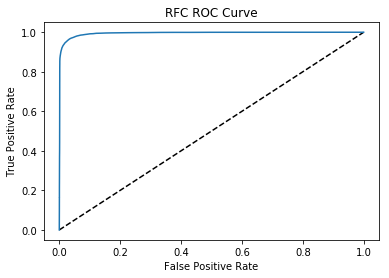

In [89]:
from sklearn.metrics import roc_curve
rfc_pre_prob = rfc.predict_proba(X_test)[:,1]
fpr, tpr , thresholds = roc_curve(y_test, rfc_pre_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label= 'Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RFC ROC Curve')
plt.show()

In [90]:
logreg.predict_proba(X_test)[:,1]

array([0.50562485, 0.5047807 , 0.35379011, ..., 0.50555162, 0.50286937,
       0.49479303])

In [91]:
# Trying to use K fold

In [92]:
# Verifying the result of RFC using GridCVsearch 
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(rfc,X,y,cv=5)

In [93]:
cv_results

array([0.87572688, 0.88318765, 0.87649038, 0.87528345, 0.86917563])

In [94]:
np.mean(cv_results)

0.8759727970555904

In [95]:
#trying decision tree also show low accuracy thus not included

In [96]:
#from sklearn.tree import DecisionTreeRegressor
#decision_tree = DecisionTreeRegressor(max_depth=5)
#decision_tree.fit(X, y)

In [97]:
#decision_tree.score(X_train, y_train)
#decision_tree.score(X_test, y_test)
#print(train_predictions=decision_tree.predict(X_train))
#print(test_predictions= decision_tree.predict(X_test))


#### Thus rfc is better model to predict  the accuracy of the model which is coming to 87.5%